# Подготовительная задача 1

Сделать из линейной регрессии nn.sequental двухслойную сеть

In [1]:
from sklearn.utils import shuffle

#### Берём лингрегрессию на torch.nn.Sequential() из лекционного ноутбука, добавляем нелинейность после 1 линейного слоя (возьмем nn.ReLU()), 2-й слой (без нелинейности, т.к. регрессионная задача), в конце цепляем ту же функцию потерь, что и в примере (MSELoss).

#### Было:

In [4]:
import torch
from time import time
from torch.autograd import Variable

N, D_in, D_out = 64, 1000, 10

x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out)
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
t1 = time()

for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    model.zero_grad()

    loss.backward()

    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

t2 = time()
print 'time : %.4f' % (t2-t1)

(0, 857.6729125976562)
(1, 548.4962768554688)
(2, 356.49444580078125)
(3, 235.2210693359375)
(4, 157.3703155517578)
(5, 106.62529754638672)
(6, 73.07510375976562)
(7, 50.600616455078125)
(8, 35.36410903930664)
(9, 24.921463012695312)
(10, 17.693471908569336)
(11, 12.64584732055664)
(12, 9.092473983764648)
(13, 6.572857856750488)
(14, 4.774569988250732)
(15, 3.4835283756256104)
(16, 2.551715135574341)
(17, 1.8759204149246216)
(18, 1.383656620979309)
(19, 1.0236485004425049)
(20, 0.7594040036201477)
(21, 0.5648042559623718)
(22, 0.4210573136806488)
(23, 0.3145752251148224)
(24, 0.23549385368824005)
(25, 0.1766223907470703)
(26, 0.1326988935470581)
(27, 0.09986011683940887)
(28, 0.07526209950447083)
(29, 0.05680388584733009)
(30, 0.04292997345328331)
(31, 0.032485414296388626)
(32, 0.024611175060272217)
(33, 0.018666332587599754)
(34, 0.014172631315886974)
(35, 0.01077133510261774)
(36, 0.008194158785045147)
(37, 0.006239172071218491)
(38, 0.004754666239023209)
(39, 0.0036263640504330397)

#### Стало:

In [6]:
N, D_in, H, D_out = 64, 1000, 50, 10

x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out),
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
t1 = time()
for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    model.zero_grad()

    loss.backward()

    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

t2 = time()
print 'time : %.4f' % (t2-t1)

(0, 703.0716552734375)
(1, 655.7613525390625)
(2, 615.4431762695312)
(3, 579.9661865234375)
(4, 548.8383178710938)
(5, 521.9345092773438)
(6, 498.02850341796875)
(7, 476.3690490722656)
(8, 456.3567810058594)
(9, 437.47186279296875)
(10, 419.8778991699219)
(11, 403.1948547363281)
(12, 387.25213623046875)
(13, 371.9632263183594)
(14, 357.287841796875)
(15, 343.2590637207031)
(16, 329.59375)
(17, 316.4574279785156)
(18, 303.8514099121094)
(19, 291.71112060546875)
(20, 280.0507507324219)
(21, 268.7318420410156)
(22, 257.8225402832031)
(23, 247.33868408203125)
(24, 237.2703857421875)
(25, 227.5963592529297)
(26, 218.31045532226562)
(27, 209.38772583007812)
(28, 200.82583618164062)
(29, 192.61846923828125)
(30, 184.75294494628906)
(31, 177.22637939453125)
(32, 170.03042602539062)
(33, 163.13607788085938)
(34, 156.4687042236328)
(35, 150.12994384765625)
(36, 144.07562255859375)
(37, 138.2964630126953)
(38, 132.75111389160156)
(39, 127.47260284423828)
(40, 122.43083190917969)
(41, 117.63652801

#### Добавление ReLU между двумя линейными слоями негативно сказалось на качестве обучения. Попробуем без него:

In [8]:
N, D_in, H, D_out = 64, 1000, 50, 10

x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
#          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out),
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
t1 = time()
for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    model.zero_grad()

    loss.backward()

    for param in model.parameters():
        param.data -= learning_rate * param.grad.data
        
t2 = time()
print 'time : %.4f' % (t2-t1)

(0, 661.3907470703125)
(1, 578.2513427734375)
(2, 509.5218505859375)
(3, 451.4657897949219)
(4, 401.60821533203125)
(5, 358.2374572753906)
(6, 320.1270446777344)
(7, 286.3717346191406)
(8, 256.2898254394531)
(9, 229.35670471191406)
(10, 205.16162109375)
(11, 183.37838745117188)
(12, 163.7419891357422)
(13, 146.0341033935547)
(14, 130.07106018066406)
(15, 115.69419860839844)
(16, 102.76373291015625)
(17, 91.15435791015625)
(18, 80.75157165527344)
(19, 71.4494400024414)
(20, 63.14929962158203)
(21, 55.75889587402344)
(22, 49.19184112548828)
(23, 43.36759567260742)
(24, 38.21115493774414)
(25, 33.65316390991211)
(26, 29.629810333251953)
(27, 26.08268165588379)
(28, 22.958667755126953)
(29, 20.20963478088379)
(30, 17.792203903198242)
(31, 15.66748332977295)
(32, 13.800765991210938)
(33, 12.16109561920166)
(34, 10.721033096313477)
(35, 9.456274032592773)
(36, 8.345368385314941)
(37, 7.369393825531006)
(38, 6.511733055114746)
(39, 5.757767677307129)
(40, 5.094674587249756)
(41, 4.51121997833

#### По сути, после выключения нелинейности мы получили одно-слойную сеть (т.к. последовательное умножение на W1 и W2 эквивалентно умножению на W = W2 * W1), и, что самое интересное, на случайных данных она работает лучше, чем сеть с нелинейностью.

# Подготовительная задача 2

Добавить в np и torch реализации баесы

#### numpy:

In [11]:
# -*- coding: utf-8 -*-
import numpy as np

# N - размер батча; D_in - размерность входа;
# H - скрытая размероность; D_out размерность выхода.
N, D_in, H, D_out = 64, 1000, 100, 10

# Инициализируем вход и выход из нормального распределения
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Инициализируем веса из нормального распределения
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

b1 = np.random.randn(H, 1)
b2 = np.random.randn(D_out, 1)

learning_rate = 1e-6
t1 = time()
for t in range(500):

    h = x.dot(w1) + b1.T
    h_relu = np.maximum(h, 0)
    
    # Используем функцию активации ReLU
    y_pred = h_relu.dot(w2) + b2.T

    # Считаем функцию потерь
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Считаем градиенты
    grad_y_pred = 2.0 * (y_pred - y)
    #print 'grad_y_pred', grad_y_pred.shape
    grad_w2 = h_relu.T.dot(grad_y_pred)
    #print 'grad_w2', grad_w2.shape
    grad_b2 = grad_y_pred.T.dot(np.ones((N, 1)))
    #print 'grad_b2', grad_b2.shape
    grad_h_relu = grad_y_pred.dot(w2.T)
    #print 'grad_h_relu', grad_h_relu.shape
    grad_h = grad_h_relu.copy()
    #print 'grad_h', grad_h.shape
    
    # Считаем композицию с производной ReLU
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    #print 'grad_w1', grad_w1.shape
    grad_b1 = grad_h.T.dot(np.ones((N, 1)))
    #print 'grad_b1', grad_b1.shape

    # Обновляем веса
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    b1 -= learning_rate * grad_b1
    b2 -= learning_rate * grad_b2

t2 = time()
print 'time : %.4f' % (t2-t1)

(0, 37330392.753631301)
(1, 35912364.209031783)
(2, 36698668.672828063)
(3, 32815895.340435382)
(4, 23746253.069216806)
(5, 13681373.625999402)
(6, 7013639.1856998242)
(7, 3657783.8669710555)
(8, 2165532.9656953644)
(9, 1475961.2537535578)
(10, 1115509.6944342521)
(11, 894403.34313723026)
(12, 740451.04342841357)
(13, 623728.76521183387)
(14, 531054.34884151246)
(15, 455511.45170173323)
(16, 393221.18557186204)
(17, 341349.31808393856)
(18, 297665.63219020946)
(19, 260635.31734594514)
(20, 229084.98690657649)
(21, 202064.54654386075)
(22, 178814.31310059779)
(23, 158707.53993820626)
(24, 141263.90337195562)
(25, 126123.96523409276)
(26, 112899.35368438139)
(27, 101287.05094331046)
(28, 91056.077694210224)
(29, 82020.222585528565)
(30, 74020.441540628584)
(31, 66918.990685065815)
(32, 60601.482526757587)
(33, 54966.800784585837)
(34, 49930.321946592303)
(35, 45419.817794974515)
(36, 41374.483188830658)
(37, 37738.360557266453)
(38, 34464.863457395899)
(39, 31513.663816217952)
(40, 28849

#### torch: 
#### NB: Т.к. в Torch нет явного broadcasting-а, баесы инициализируем сразу нужной размерности (как будто знаем, что работаем с батчами длины N)

In [13]:
import torch
from time import time
from torch.autograd import Variable

dtype = torch.FloatTensor
#dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10

x = Variable(torch.randn(N, D_in).type(dtype), requires_grad=False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad=False)

w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad=True)

b1 = Variable(torch.randn(N, H).type(dtype), requires_grad=True)
b2 = Variable(torch.randn(N, D_out).type(dtype), requires_grad=True)

t1 = time()
learning_rate = 1e-6
for t in range(500):
    y_pred = (x.mm(w1) + b1).clamp(min=0).mm(w2) + b2

    loss = (y_pred - y).pow(2).sum()
    print(t, loss.data[0])
    
    # Обнуляем градиенты
    w1.grad.data.zero_()
    w2.grad.data.zero_()
    b1.grad.data.zero_()
    b2.grad.data.zero_()

    loss.backward()

    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data
    b1.data -= learning_rate * b1.grad.data
    b2.data -= learning_rate * b2.grad.data

t2 = time()
print 'time : %.4f' % (t2-t1)

(0, 36429732.0)
(1, 38981324.0)
(2, 48993904.0)
(3, 55558420.0)
(4, 45859792.0)
(5, 24931694.0)
(6, 9446364.0)
(7, 3548720.25)
(8, 1818632.5)
(9, 1254913.125)
(10, 992908.625)
(11, 825302.125)
(12, 699620.75)
(13, 599426.4375)
(14, 517518.21875)
(15, 449903.09375)
(16, 393429.5625)
(17, 345818.78125)
(18, 305345.5625)
(19, 270720.59375)
(20, 240933.96875)
(21, 215172.90625)
(22, 192818.53125)
(23, 173310.8125)
(24, 156191.15625)
(25, 141163.921875)
(26, 127881.1640625)
(27, 116111.4296875)
(28, 105652.3046875)
(29, 96333.1875)
(30, 87999.8359375)
(31, 80521.65625)
(32, 73799.28125)
(33, 67751.671875)
(34, 62312.22265625)
(35, 57399.28515625)
(36, 52943.7421875)
(37, 48896.26953125)
(38, 45216.67578125)
(39, 41875.12890625)
(40, 38824.59375)
(41, 36033.76953125)
(42, 33477.39453125)
(43, 31129.986328125)
(44, 28974.1875)
(45, 26990.623046875)
(46, 25166.205078125)
(47, 23484.693359375)
(48, 21932.431640625)
(49, 20497.7890625)
(50, 19170.654296875)
(51, 17941.474609375)
(52, 16801.89843

#### Еще один неожиданный результат: казалось бы, идентичные архитектуры, реализованные на numpy (ручные градиенты) и torch (автоматические градиенты) работают с разным успехом, причем сеть на примитивах numpy выигрывает.

# Подготовительная задача 3 

В реализациях на np и разных вариантах на torch рисовать графики loss(iteration) и gradients(iterations)

In [4]:
# будем рисовать красиво:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_palette('Set2', 10)
sns.set_style('whitegrid')

#### Возьмем реализацию двухслойной сети на numpy (выше) и порисуем нужные графики:

In [6]:
def plot_results(losses, gradients, title='', names = ['w1', 'w2', 'b1', 'b2']):
    gradients = np.array(gradients)
    n_gradients = gradients.shape[1]
    epochs = range(len(losses))
    
    plt.figure(figsize=(16, 8))

    plt.suptitle(title, fontsize = 20)
    
    plt.subplot(2, 2, 1)
    plt.plot(epochs, losses, label = 'loss on epoch')
    plt.xlabel('# epoch')
    plt.legend(fontsize=15)

    plt.subplot(2, 2, 2)
    plt.plot(epochs, losses, label = 'loss on epoch')
    plt.xlabel('# epoch')
    plt.legend(fontsize=15)
    plt.yscale('log')
    
    plt.subplot(2, 2, 3)
    for j in xrange(n_gradients):
        plt.plot(epochs, gradients[:, j], label = names[j])
    plt.xlabel('# epoch')
    plt.legend(fontsize=15)
    
    plt.subplot(2, 2, 4)
    for j in xrange(n_gradients):
        plt.plot(epochs, gradients[:, j], label = names[j])
    plt.xlabel('# epoch')
    plt.yscale('log')
    plt.legend(fontsize=15)
    
    plt.show()

#### numpy:

In [19]:
# -*- coding: utf-8 -*-
import numpy as np

# N - размер батча; D_in - размерность входа;
# H - скрытая размероность; D_out размерность выхода.
N, D_in, H, D_out = 64, 1000, 100, 10

# Инициализируем вход и выход из нормального распределения
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Инициализируем веса из нормального распределения
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

b1 = np.random.randn(H, 1)
b2 = np.random.randn(D_out, 1)

learning_rate = 1e-6
t1 = time()

losses = []
gradients = []

for t in range(500):

    h = x.dot(w1) + b1.T
    h_relu = np.maximum(h, 0)
    
    # Используем функцию активации ReLU
    y_pred = h_relu.dot(w2) + b2.T

    # Считаем функцию потерь
    loss = np.square(y_pred - y).sum()
    losses.append(loss)

    print(t, loss)

    # Считаем градиенты
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_b2 = grad_y_pred.T.dot(np.ones((N, 1)))
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()

    # Считаем композицию с производной ReLU
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    grad_b1 = grad_h.T.dot(np.ones((N, 1)))

    gradients.append((np.linalg.norm(grad_w1), np.linalg.norm(grad_w2), 
                      np.linalg.norm(grad_b1), np.linalg.norm(grad_b2)))


    # Обновляем веса
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    b1 -= learning_rate * grad_b1
    b2 -= learning_rate * grad_b2

t2 = time()
print 'time : %.4f' % (t2-t1)

(0, 42456361.177992225)
(1, 40201245.999324709)
(2, 37286994.380280457)
(3, 28783300.363113984)
(4, 17581392.96910318)
(5, 9110677.042707799)
(6, 4673322.433020045)
(7, 2700703.9210592238)
(8, 1816590.0255365949)
(9, 1364225.764086829)
(10, 1090162.3593289275)
(11, 899516.79716801329)
(12, 755620.38902386604)
(13, 641979.89872048318)
(14, 549439.73233354185)
(15, 473063.76549951243)
(16, 409502.51353440853)
(17, 356130.89164220926)
(18, 311038.08312439034)
(19, 272649.21417602128)
(20, 239826.26200600871)
(21, 211636.51778233878)
(22, 187295.27574937389)
(23, 166182.96020782477)
(24, 147805.06503158476)
(25, 131750.6855728309)
(26, 117688.38277212545)
(27, 105332.56933943919)
(28, 94445.332608120749)
(29, 84832.73975080144)
(30, 76318.457897972083)
(31, 68765.503177352482)
(32, 62052.309292834405)
(33, 56072.073172594406)
(34, 50736.901814633733)
(35, 45966.847826930418)
(36, 41691.468823721138)
(37, 37857.418340831551)
(38, 34415.009730447957)
(39, 31317.325189052452)
(40, 28525.83984

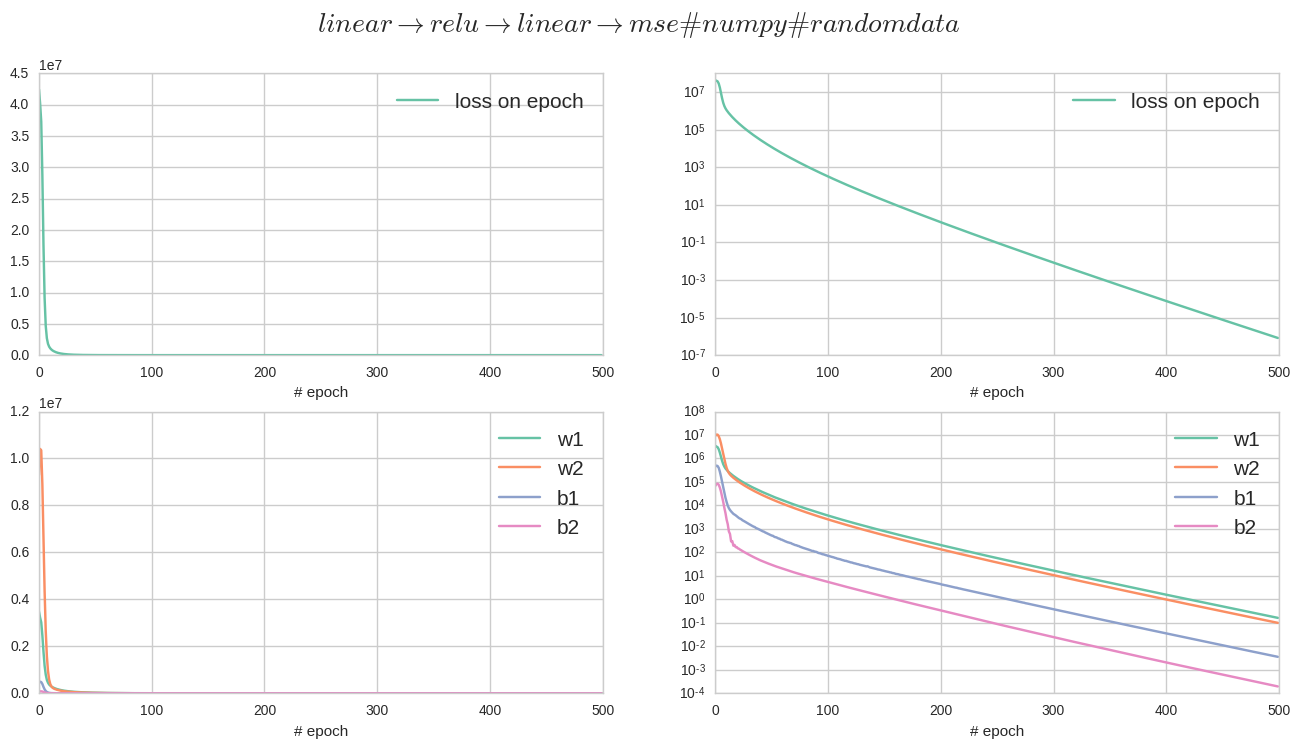

In [20]:
plot_results(losses, gradients, '$linear \\rightarrow relu \\rightarrow linear \\rightarrow mse \# numpy \# random data$', ['w1', 'w2', 'b1', 'b2'])

#### torch:

In [22]:
import torch
import numpy as np

from time import time
from torch.autograd import Variable

dtype = torch.FloatTensor
#dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10

x = Variable(torch.randn(N, D_in).type(dtype), requires_grad=False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad=False)

w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad=True)

b1 = Variable(torch.randn(N, H).type(dtype), requires_grad=True)
b2 = Variable(torch.randn(N, D_out).type(dtype), requires_grad=True)

t1 = time()
learning_rate = 1e-6

losses = []
gradients = []

for t in range(500):
    y_pred = (x.mm(w1) + b1).clamp(min=0).mm(w2) + b2

    loss = (y_pred - y).pow(2).sum()
    losses.append(loss.data[0])
    print(t, loss.data[0])
    
    # Обнуляем градиенты
    w1.grad.data.zero_()
    w2.grad.data.zero_()
    b1.grad.data.zero_()
    b2.grad.data.zero_()

    loss.backward()

    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data
    b1.data -= learning_rate * b1.grad.data
    b2.data -= learning_rate * b2.grad.data
    
    gradients.append((w1.grad.data.norm(), w2.grad.data.norm(), b1.grad.data.norm(), b2.grad.data.norm()))

t2 = time()
print t2-t1

(0, 32936844.0)
(1, 31201710.0)
(2, 39021468.0)
(3, 49339320.0)
(4, 50854560.0)
(5, 36401388.0)
(6, 17104524.0)
(7, 6212071.5)
(8, 2491589.25)
(9, 1388476.75)
(10, 995672.625)
(11, 797030.625)
(12, 664074.875)
(13, 562521.3125)
(14, 480954.90625)
(15, 414051.625)
(16, 358494.6875)
(17, 311953.90625)
(18, 272722.8125)
(19, 239454.234375)
(20, 211133.125)
(21, 186842.875)
(22, 165917.359375)
(23, 147801.421875)
(24, 132037.9375)
(25, 118280.8046875)
(26, 106228.9140625)
(27, 95628.1171875)
(28, 86269.9375)
(29, 77970.90625)
(30, 70610.1484375)
(31, 64064.921875)
(32, 58228.6953125)
(33, 53009.0625)
(34, 48331.30078125)
(35, 44128.56640625)
(36, 40348.203125)
(37, 36938.52734375)
(38, 33860.04296875)
(39, 31076.583984375)
(40, 28552.91796875)
(41, 26265.0859375)
(42, 24186.65625)
(43, 22294.435546875)
(44, 20569.37109375)
(45, 18995.419921875)
(46, 17557.74609375)
(47, 16241.8837890625)
(48, 15037.0068359375)
(49, 13932.44140625)
(50, 12918.99609375)
(51, 11987.814453125)
(52, 11131.66503

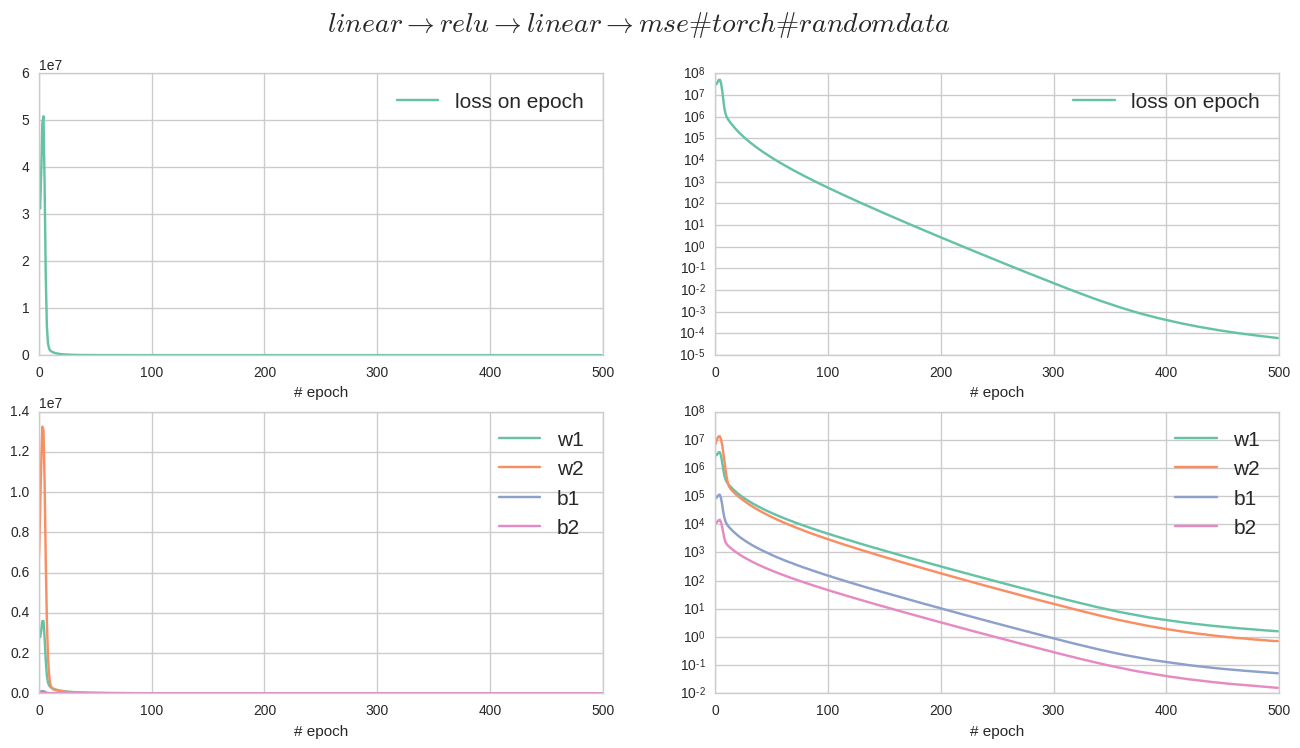

In [23]:
plot_results(losses, gradients, '$linear \\rightarrow relu \\rightarrow linear \\rightarrow mse \# torch \# random data$', ['w1', 'w2', 'b1', 'b2'])

# Задача

Повторить обучение на mnist из прошлой домашки:
 	
Используя структуру сети Sequental в pytorch реализовать и обучить классификатор цифр из MNIST

1. Количество слоев от 1 до 4
2. Разные размеры скрытых слоев: 5, 10, 50, 100, 300
3. С разными функциями активации (без, ReLU, sigmoid, tanh)
4. С разными функциями потерь (CrossEntropy, MSE)
5. Со смещениями и без.

Каждый пункт 2-3 варианта.

Результат в форме отчета: скорость и качество обучения от параметров сети.
Везде где имеет смысл нарисовать графики.

Объяснить разницу в обучении с разными параметрами.

#### Загрузим датасет MNIST, отделим тестовую выборку:

In [8]:
import pickle as pkl
with open('data.pkl', 'rb') as f:
    data = pkl.load(f)
X = data['X']
Y = data['y']
print X.shape, Y.shape

(70000, 784) (70000, 10)


In [9]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score as accuracy

X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = .2)

In [10]:
def make_label(z):
    return np.argmax(z, axis=1)#.reshape(-1, 1)

# I. Активации

#### Зафиксируем двухслойную архитектуру с линейными слоями по 784 и 50 соответственно, обучимся на MNIST по 50-батчам без активации в конце, с MSE; попробуем разные функции активации.

In [12]:
batch_size = 50
n_batches = X.shape[0] / batch_size

In [13]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette('Set2', 10)
sns.set_style('whitegrid')

from time import time
from torch.autograd import Variable

#### Sigmoid:

In [32]:
N, D1, D2, D3 = batch_size, X.shape[1], 50, Y.shape[1]
dtype = torch.FloatTensor

# Опишем переменные для проверки accuracy:
x_test = Variable(torch.from_numpy(X_test).type(dtype), requires_grad = False)
y_test = Variable(torch.from_numpy(Y_test).type(dtype), requires_grad = False)
x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

model = torch.nn.Sequential(
          torch.nn.Linear(D1, D2),
          torch.nn.Sigmoid(),
          torch.nn.Linear(D2, D3),
        )
loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4

loss_avg = 0
losses = []
gradients = []
accuracy_test = []
accuracy_train = []

for t in range(100):
    grad_w1 = 0
    grad_b1 = 0
    grad_w2 = 0
    grad_b2 = 0
    X_train, Y_train = shuffle(X_train, Y_train)
    x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
    y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

    for b in xrange(n_batches):
        x = Variable(torch.from_numpy(X_train[b : b + batch_size, :]).type(dtype), requires_grad = False)
        y = Variable(torch.from_numpy(Y_train[b : b + batch_size, :]).type(dtype), requires_grad = False)
        y_pred = model(x)
        
        loss = loss_fn(y_pred, y)
        loss_avg += loss.data
        
        grad_w1 += list(model[0].parameters())[0].grad.data.norm()
        grad_b1 += list(model[0].parameters())[1].grad.data.norm()
        grad_w2 += list(model[2].parameters())[0].grad.data.norm()
        grad_b2 += list(model[2].parameters())[1].grad.data.norm()
        
        model.zero_grad()
        loss.backward()
        
        for param in model.parameters():
            param.data -= learning_rate * param.grad.data
        
        del x, y
        
    gradients.append((grad_w1 / n_batches, grad_w2 / n_batches, grad_b1 / n_batches, grad_b2 / n_batches))
    losses.append(loss_avg[0])
    y_test_pred = make_label(model(x_test).data.numpy())
    y_train_pred = make_label(model(x_train).data.numpy())
    acc_test = accuracy(np.argmax(Y_test, 1), y_test_pred)
    accuracy_test.append(acc_test)
    acc_train = accuracy(np.argmax(Y_train, 1), y_train_pred)
    accuracy_train.append(acc_train)
    
    print ("%d, %.4f, %.4f" % (t, loss_avg[0] / batch_size, acc_test))
    loss_avg = 0

0, 640.0505, 0.7409
1, 459.7742, 0.7967
2, 385.8719, 0.8174
3, 354.4025, 0.8289
4, 307.6305, 0.8477
5, 311.9079, 0.8591
6, 293.7175, 0.8606
7, 277.8071, 0.8624
8, 235.5686, 0.8576
9, 261.1904, 0.8705
10, 223.2848, 0.8670
11, 261.4165, 0.8706
12, 230.4224, 0.8749
13, 258.5502, 0.8701
14, 242.9414, 0.8771
15, 231.6957, 0.8786
16, 228.2558, 0.8816
17, 221.2826, 0.8729
18, 227.4242, 0.8815
19, 227.5304, 0.8870
20, 213.6339, 0.8831
21, 224.7819, 0.8879
22, 241.0032, 0.8895
23, 225.3837, 0.8841
24, 246.4920, 0.8878
25, 214.3416, 0.8886
26, 202.9138, 0.8797
27, 223.4956, 0.8872
28, 195.8773, 0.8921
29, 217.7783, 0.8924
30, 218.8955, 0.8915
31, 211.0776, 0.8930
32, 209.6456, 0.8956
33, 215.6041, 0.8944
34, 196.6457, 0.8937
35, 198.9634, 0.9006
36, 192.8334, 0.8925
37, 187.2823, 0.8951
38, 204.6298, 0.8950
39, 184.6519, 0.8994
40, 196.7947, 0.8940
41, 211.1296, 0.8974
42, 203.3219, 0.8975
43, 193.9272, 0.8986
44, 186.1901, 0.8986
45, 191.4390, 0.9016
46, 195.3372, 0.9044
47, 205.8384, 0.8997
48

In [33]:
loss_sigmoid = losses
accuracy_train_sigmoid = accuracy_train
accuracy_test_sigmoid = accuracy_test

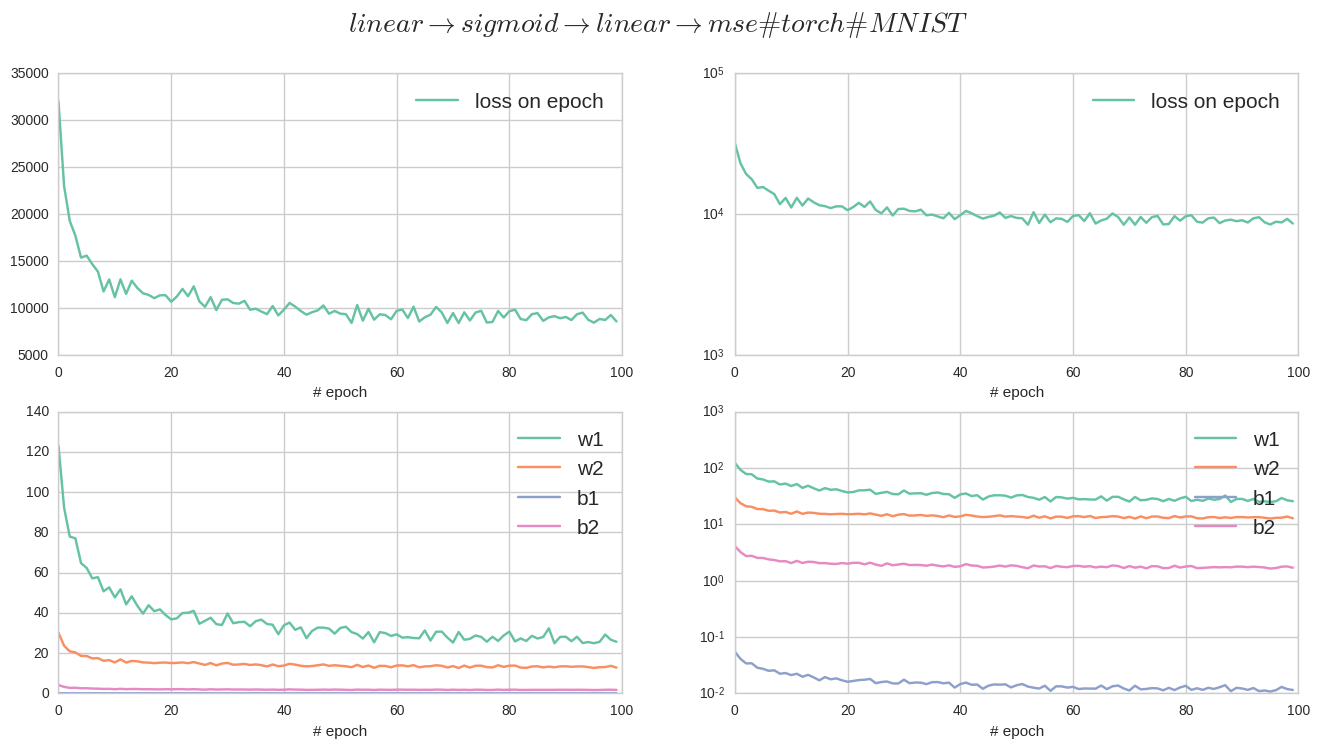

In [34]:
plot_results(losses, gradients, '$linear \\rightarrow sigmoid \\rightarrow linear \\rightarrow mse \# torch \# MNIST$')

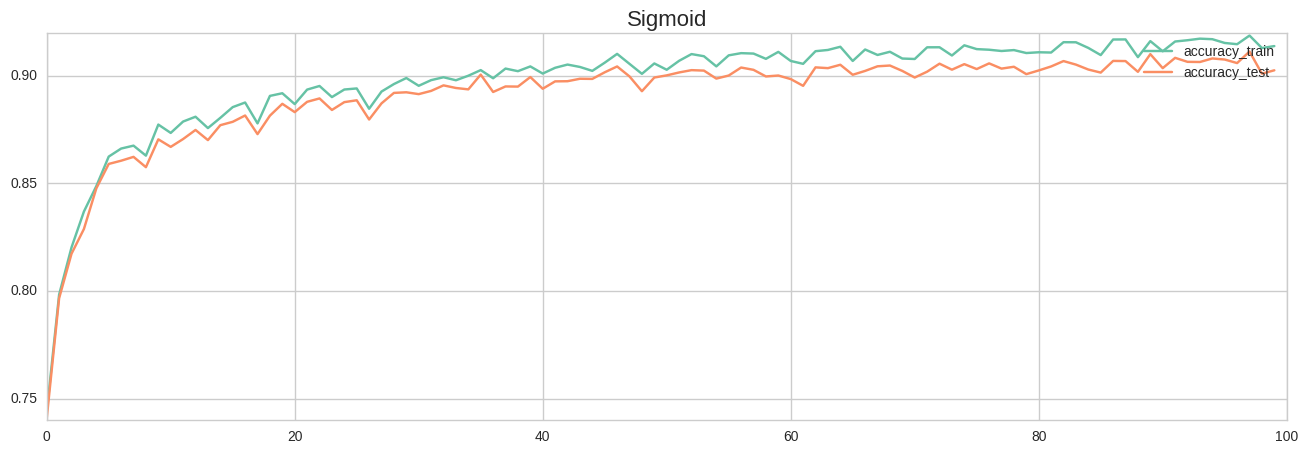

In [35]:
plt.figure(figsize=(16, 5))
plt.plot(range(len(accuracy_train_sigmoid)), accuracy_train_sigmoid, label = 'accuracy_train')
plt.plot(range(len(accuracy_test_sigmoid)), accuracy_test_sigmoid, label = 'accuracy_test')
plt.title('Sigmoid', fontsize = 16)
plt.legend()
plt.show()

#### Accuracy на уровне 91%.

#### Tanh:

In [38]:
N, D1, D2, D3 = batch_size, X.shape[1], 50, Y.shape[1]
dtype = torch.FloatTensor

# Опишем переменные для проверки accuracy:
x_test = Variable(torch.from_numpy(X_test).type(dtype), requires_grad = False)
y_test = Variable(torch.from_numpy(Y_test).type(dtype), requires_grad = False)
x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

model = torch.nn.Sequential(
          torch.nn.Linear(D1, D2),
          torch.nn.Tanh(),
          torch.nn.Linear(D2, D3),
        )
loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4

loss_avg = 0
losses = []
gradients = []
accuracy_test = []
accuracy_train = []

for t in range(100):
    grad_w1 = 0
    grad_b1 = 0
    grad_w2 = 0
    grad_b2 = 0
    X_train, Y_train = shuffle(X_train, Y_train)
    x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
    y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

    for b in xrange(n_batches):
        x = Variable(torch.from_numpy(X_train[b : b + batch_size, :]).type(dtype), requires_grad = False)
        y = Variable(torch.from_numpy(Y_train[b : b + batch_size, :]).type(dtype), requires_grad = False)
        y_pred = model(x)
        
        loss = loss_fn(y_pred, y)
        loss_avg += loss.data
        
        grad_w1 += list(model[0].parameters())[0].grad.data.norm()
        grad_b1 += list(model[0].parameters())[1].grad.data.norm()
        grad_w2 += list(model[2].parameters())[0].grad.data.norm()
        grad_b2 += list(model[2].parameters())[1].grad.data.norm()
        
        model.zero_grad()
        loss.backward()
        
        for param in model.parameters():
            param.data -= learning_rate * param.grad.data
        
        del x, y
        
    gradients.append((grad_w1 / n_batches, grad_w2 / n_batches, grad_b1 / n_batches, grad_b2 / n_batches))
    losses.append(loss_avg[0])
    y_test_pred = make_label(model(x_test).data.numpy())
    y_train_pred = make_label(model(x_train).data.numpy())
    acc_test = accuracy(np.argmax(Y_test, 1), y_test_pred)
    accuracy_test.append(acc_test)
    acc_train = accuracy(np.argmax(Y_train, 1), y_train_pred)
    accuracy_train.append(acc_train)
    
    print ("%d, %.4f, %.4f" % (t, loss_avg[0] / batch_size, acc_test))
    loss_avg = 0

0, 897.0059, 0.6070
1, 643.8680, 0.6289
2, 625.2232, 0.6527
3, 632.1173, 0.6491
4, 580.9661, 0.7101
5, 578.9717, 0.6803
6, 573.0528, 0.6909
7, 553.0383, 0.7158
8, 500.5694, 0.7539
9, 470.3260, 0.7734
10, 507.1467, 0.7379
11, 465.6187, 0.7644
12, 479.2092, 0.7484
13, 459.4685, 0.7866
14, 471.8556, 0.7769
15, 453.0365, 0.7709
16, 487.3814, 0.7876
17, 418.5590, 0.7769
18, 399.5253, 0.7896
19, 394.3466, 0.8096
20, 440.3158, 0.7896
21, 431.9581, 0.7784
22, 473.1912, 0.7361
23, 441.3718, 0.7658
24, 455.7079, 0.8025
25, 370.0013, 0.8136
26, 411.3541, 0.7898
27, 418.3832, 0.7751
28, 433.8852, 0.8081
29, 373.7480, 0.8189
30, 410.9178, 0.7958
31, 435.3098, 0.8119
32, 431.2754, 0.7846
33, 431.5508, 0.8099
34, 386.9493, 0.8076
35, 384.7800, 0.8234
36, 364.5888, 0.7997
37, 348.0638, 0.8355
38, 393.8440, 0.8281
39, 380.6916, 0.8270
40, 361.3640, 0.8284
41, 374.3007, 0.8278
42, 358.7673, 0.8369
43, 339.1772, 0.8341
44, 358.0161, 0.8334
45, 398.3858, 0.7992
46, 344.7774, 0.7989
47, 353.4542, 0.8263
48

In [39]:
loss_tanh = losses
accuracy_train_tanh = accuracy_train
accuracy_test_tanh = accuracy_test

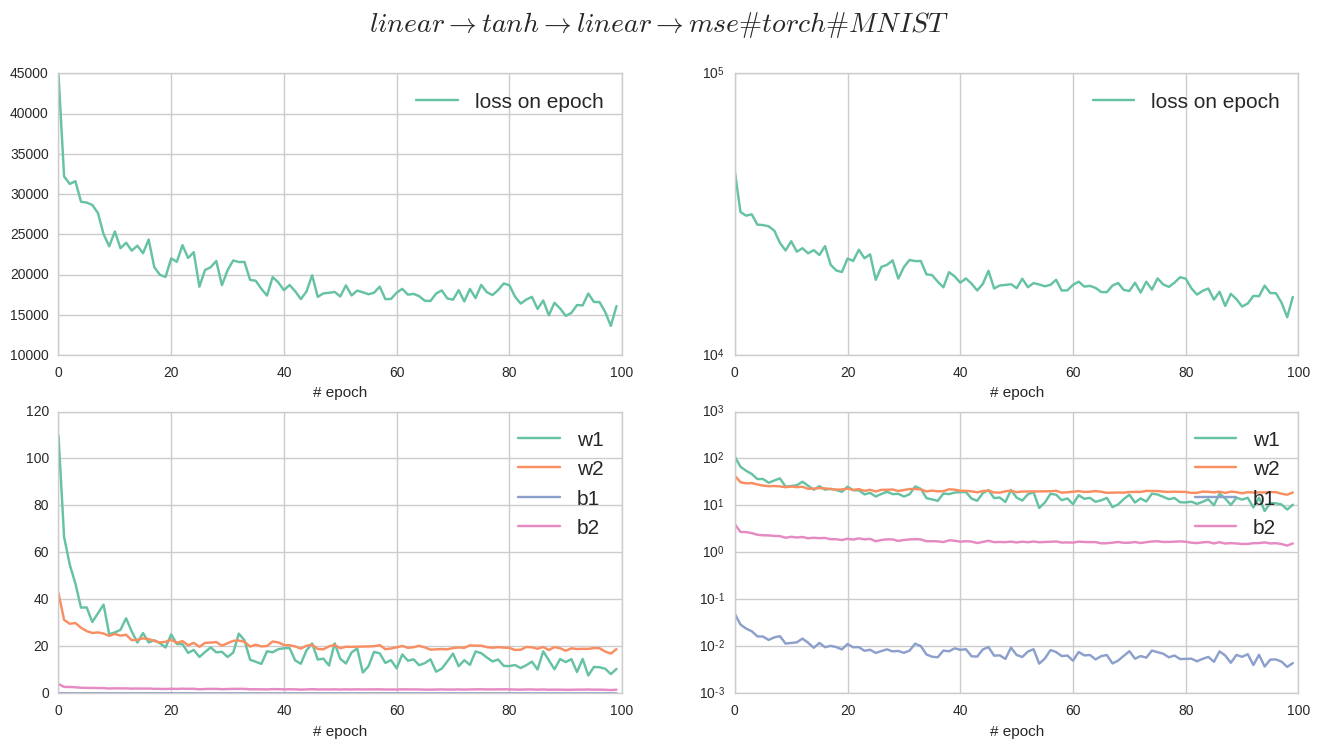

In [40]:
plot_results(losses, gradients, '$linear \\rightarrow tanh \\rightarrow linear \\rightarrow mse \# torch \# MNIST$')

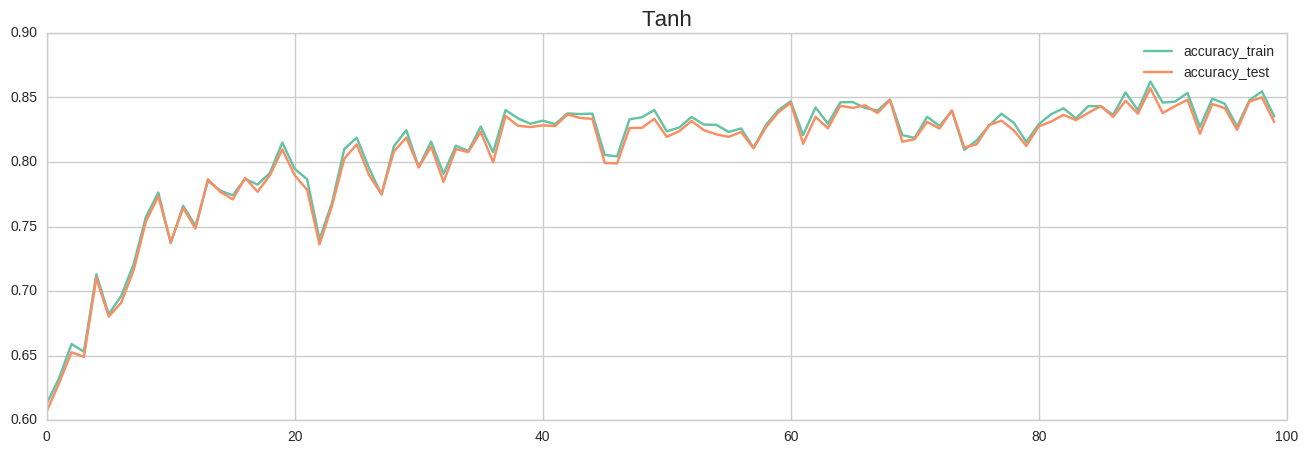

In [41]:
plt.figure(figsize=(16, 5))
plt.plot(range(len(accuracy_train_tanh)), accuracy_train_tanh, label = 'accuracy_train')
plt.plot(range(len(accuracy_test_tanh)), accuracy_test_tanh, label = 'accuracy_test')
plt.title('Tanh', fontsize = 16)
plt.legend()
plt.show()

#### Получили accuracy на уровне 85%.

#### ReLU:

In [44]:
N, D1, D2, D3 = batch_size, X.shape[1], 50, Y.shape[1]
dtype = torch.FloatTensor

# Опишем переменные для проверки accuracy:
x_test = Variable(torch.from_numpy(X_test).type(dtype), requires_grad = False)
y_test = Variable(torch.from_numpy(Y_test).type(dtype), requires_grad = False)
x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

model = torch.nn.Sequential(
          torch.nn.Linear(D1, D2),
          torch.nn.ReLU(),
          torch.nn.Linear(D2, D3),
        )
loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4

loss_avg = 0
losses = []
gradients = []
accuracy_test = []
accuracy_train = []

for t in range(100):
    grad_w1 = 0
    grad_b1 = 0
    grad_w2 = 0
    grad_b2 = 0
    X_train, Y_train = shuffle(X_train, Y_train)
    x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
    y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

    for b in xrange(n_batches):
        x = Variable(torch.from_numpy(X_train[b : b + batch_size, :]).type(dtype), requires_grad = False)
        y = Variable(torch.from_numpy(Y_train[b : b + batch_size, :]).type(dtype), requires_grad = False)
        y_pred = model(x)
        
        loss = loss_fn(y_pred, y)
        loss_avg += loss.data
        
        grad_w1 += list(model[0].parameters())[0].grad.data.norm()
        grad_b1 += list(model[0].parameters())[1].grad.data.norm()
        grad_w2 += list(model[2].parameters())[0].grad.data.norm()
        grad_b2 += list(model[2].parameters())[1].grad.data.norm()
        
        model.zero_grad()
        loss.backward()
        
        for param in model.parameters():
            param.data -= learning_rate * param.grad.data
        
        del x, y
        
    gradients.append((grad_w1 / n_batches, grad_w2 / n_batches, grad_b1 / n_batches, grad_b2 / n_batches))
    losses.append(loss_avg[0])
    y_test_pred = make_label(model(x_test).data.numpy())
    y_train_pred = make_label(model(x_train).data.numpy())
    acc_test = accuracy(np.argmax(Y_test, 1), y_test_pred)
    accuracy_test.append(acc_test)
    acc_train = accuracy(np.argmax(Y_train, 1), y_train_pred)
    accuracy_train.append(acc_train)
    
    print ("%d, %.4f, %.4f" % (t, loss_avg[0] / batch_size, acc_test))
    loss_avg = 0

0, 308818563878092.8125, 0.0993
1, 58988.6900, 0.1042
2, 1254.8624, 0.1026
3, 1254.7948, 0.1026
4, 1254.4104, 0.1042
5, 1255.0054, 0.0993
6, 1255.4085, 0.1091
7, 1254.6851, 0.1091
8, 1253.9016, 0.0975
9, 1253.8162, 0.1026
10, 1253.7973, 0.1026
11, 1253.4191, 0.1091
12, 1254.4464, 0.0993
13, 1254.5628, 0.1031
14, 1254.7743, 0.1091
15, 1253.9262, 0.1042
16, 1254.2805, 0.1026
17, 1252.5547, 0.1091
18, 1254.1022, 0.1091
19, 1255.5079, 0.1031
20, 1254.8769, 0.0975
21, 1253.6447, 0.1091
22, 1254.8558, 0.1091
23, 1253.0852, 0.1031
24, 1254.5348, 0.0993
25, 1254.8369, 0.1091
26, 1254.4180, 0.1091
27, 1254.3458, 0.1042
28, 1255.7611, 0.1091
29, 1255.5705, 0.1026
30, 1252.0656, 0.1026
31, 1254.1437, 0.1026
32, 1254.5891, 0.1031
33, 1253.3891, 0.1026
34, 1253.8383, 0.1026
35, 1253.3002, 0.1091
36, 1255.3410, 0.1031
37, 1255.0576, 0.0975
38, 1253.5511, 0.1091
39, 1255.3279, 0.1017
40, 1253.7644, 0.0993
41, 1253.1348, 0.1026
42, 1255.0802, 0.1042
43, 1253.1795, 0.1026
44, 1250.9368, 0.1017
45, 1256

In [45]:
loss_relu = losses
accuracy_train_relu = accuracy_train
accuracy_test_relu = accuracy_test

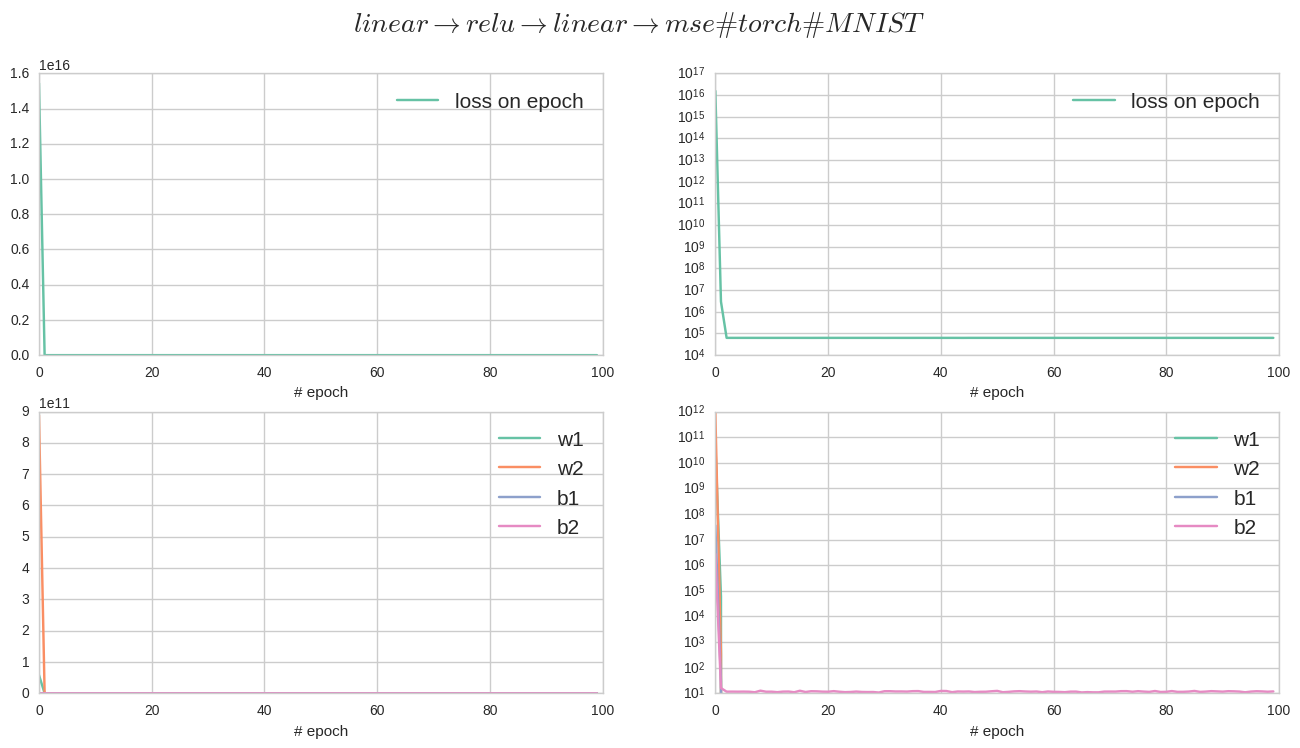

In [46]:
plot_results(losses, gradients, '$linear \\rightarrow relu \\rightarrow linear \\rightarrow mse \# torch \# MNIST$')

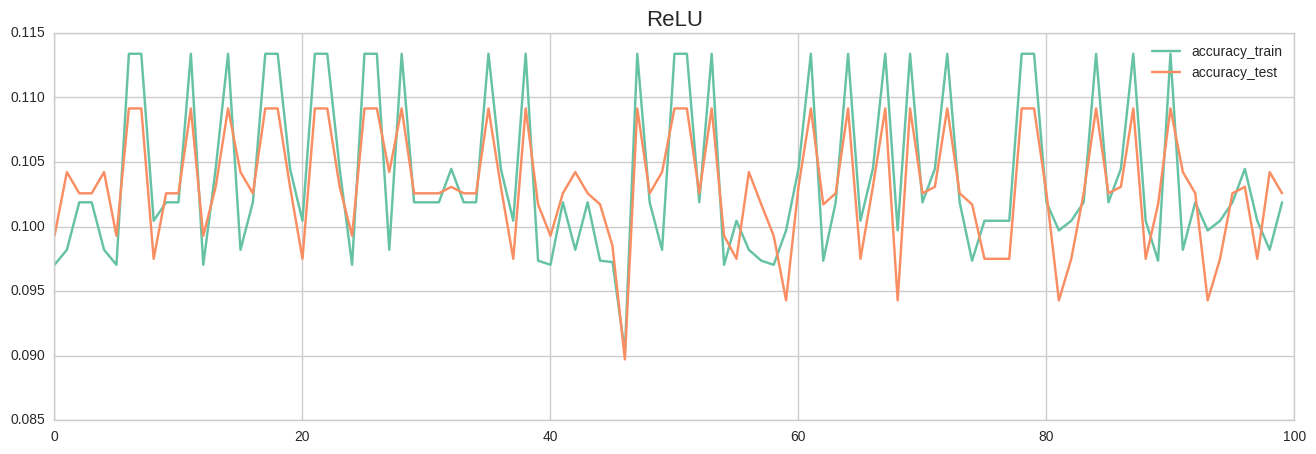

In [47]:
plt.figure(figsize=(16, 5))
plt.plot(range(len(accuracy_train_relu)), accuracy_train_relu, label = 'accuracy_train')
plt.plot(range(len(accuracy_test_relu)), accuracy_test_relu, label = 'accuracy_test')
plt.title('ReLU', fontsize = 16)
plt.legend()
plt.show()

#### C ReLU без дополнительных подручиваний ручек обучение не работает. Есть подозрение, что с квадратичной  функцией потерь и активацией ReLU в итоговую функцию потерь входят очень большие значения выходов сети, которые"задавливают" значения целевой переменной.

# II. Кросс-энтропийная функция потерь

#### Попробуем всё то же самое, но с кросс-энтропией в качестве функции потерь. Для этого добавим слой Softmax в конце. Кроме того, ответы в формате one-hot-encoding для кросс-энтропии уже не работают.

#### Sigmoid:

In [50]:
N, D1, D2, D3 = batch_size, X.shape[1], 50, Y.shape[1]
dtype = torch.FloatTensor

# Опишем переменные для проверки accuracy:
x_test = Variable(torch.from_numpy(X_test).type(dtype), requires_grad = False)
y_test = Variable(torch.from_numpy(Y_test).type(dtype), requires_grad = False)
x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

model = torch.nn.Sequential(
          torch.nn.Linear(D1, D2),
          torch.nn.Sigmoid(),
          torch.nn.Linear(D2, D3),
          torch.nn.Softmax(),
        )
loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4

loss_avg = 0
losses = []
gradients = []
accuracy_test = []
accuracy_train = []

for t in range(100):
    grad_w1 = 0
    grad_b1 = 0
    grad_w2 = 0
    grad_b2 = 0
    X_train, Y_train = shuffle(X_train, Y_train)
    x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
    y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

    for b in xrange(n_batches):
        x = Variable(torch.from_numpy(X_train[b : b + batch_size, :]).type(dtype), requires_grad = False)
        y = Variable(torch.from_numpy(np.argmax(Y_train[b : b + batch_size, :], 1)).type(torch.LongTensor), requires_grad = False)
        y_pred = model(x)
        
        loss = loss_fn(input = y_pred, target = y)
        loss_avg += loss.data
        
        grad_w1 += list(model[0].parameters())[0].grad.data.norm()
        grad_b1 += list(model[0].parameters())[1].grad.data.norm()
        grad_w2 += list(model[2].parameters())[0].grad.data.norm()
        grad_b2 += list(model[2].parameters())[1].grad.data.norm()
        
        model.zero_grad()
        loss.backward()
        
        for param in model.parameters():
            param.data -= learning_rate * param.grad.data
        
        del x, y
        
    gradients.append((grad_w1 / n_batches, grad_w2 / n_batches, grad_b1 / n_batches, grad_b2 / n_batches))
    losses.append(loss_avg[0])
    y_test_pred = make_label(model(x_test).data.numpy())
    y_train_pred = make_label(model(x_train).data.numpy())
    acc_test = accuracy(np.argmax(Y_test, 1), y_test_pred)
    accuracy_test.append(acc_test)
    acc_train = accuracy(np.argmax(Y_train, 1), y_train_pred)
    accuracy_train.append(acc_train)
    
    print ("%d, %.4f, %.4f" % (t, loss_avg[0] / batch_size, acc_test))
    loss_avg = 0

0, 3140.0966, 0.4584
1, 2964.6875, 0.6271
2, 2761.1350, 0.6773
3, 2626.7762, 0.7364
4, 2508.1800, 0.7632
5, 2433.8137, 0.7904
6, 2393.3730, 0.7961
7, 2350.4217, 0.7967
8, 2346.2959, 0.8018
9, 2324.4675, 0.8097
10, 2335.5363, 0.8055
11, 2307.1934, 0.8086
12, 2313.3628, 0.8139
13, 2306.9867, 0.8144
14, 2298.3561, 0.8189
15, 2305.9227, 0.8214
16, 2287.7744, 0.8194
17, 2295.6328, 0.8256
18, 2282.4031, 0.8341
19, 2272.3895, 0.8456
20, 2244.4437, 0.8636
21, 2241.0558, 0.8791
22, 2221.9923, 0.8846
23, 2211.6695, 0.8819
24, 2223.0934, 0.8872
25, 2197.5289, 0.8873
26, 2204.2005, 0.8901
27, 2194.9144, 0.8897
28, 2184.9436, 0.8906
29, 2185.0580, 0.8911
30, 2192.4642, 0.8921
31, 2169.6989, 0.8889
32, 2178.6347, 0.8926
33, 2173.3428, 0.8939
34, 2173.3486, 0.8942
35, 2171.0892, 0.8971
36, 2184.2831, 0.8944
37, 2188.9933, 0.8971
38, 2187.0872, 0.8966
39, 2178.9436, 0.8980
40, 2180.6822, 0.8994
41, 2165.2070, 0.8983
42, 2163.5991, 0.8969
43, 2170.5138, 0.8984
44, 2171.7220, 0.8981
45, 2168.9092, 0.902

In [51]:
loss_sigmoid = losses
accuracy_train_sigmoid = accuracy_train
accuracy_test_sigmoid = accuracy_test

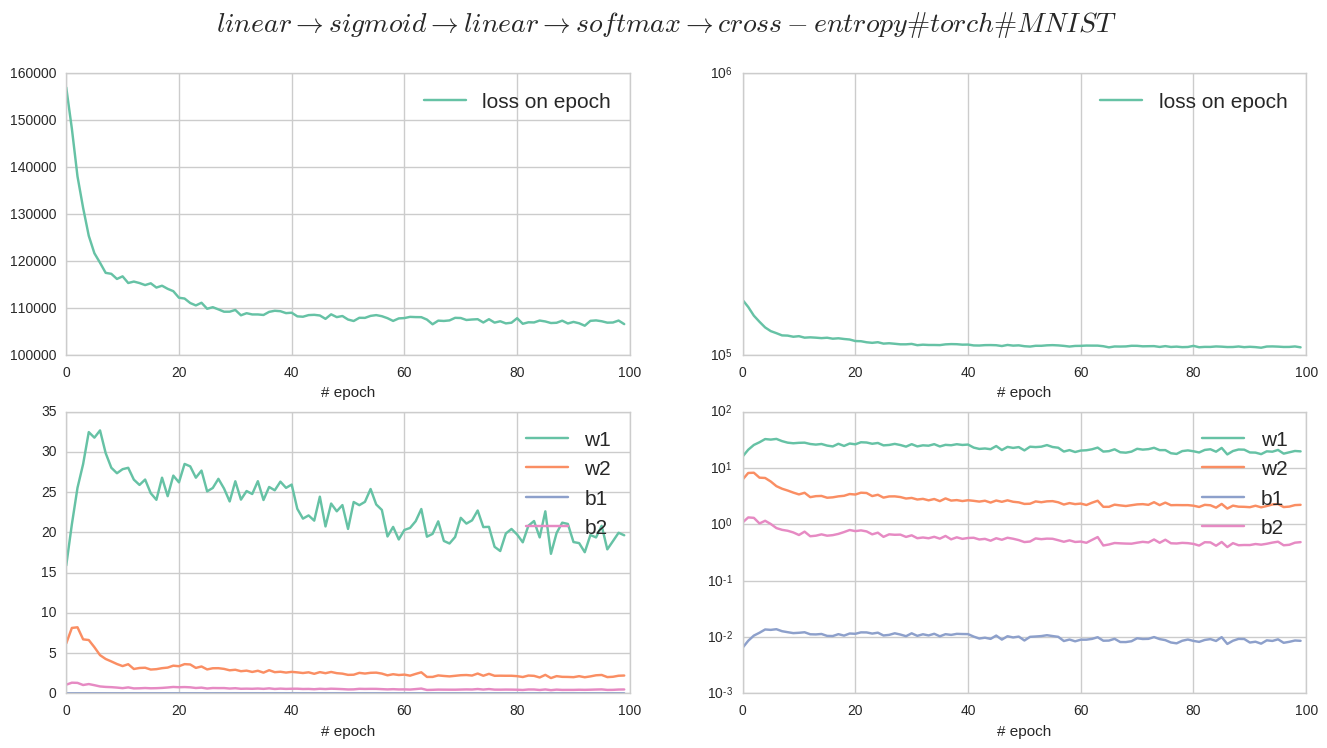

In [52]:
plot_results(losses, gradients, '$linear \\rightarrow sigmoid \\rightarrow linear \\rightarrow softmax \\rightarrow cross-entropy \# torch \# MNIST$')

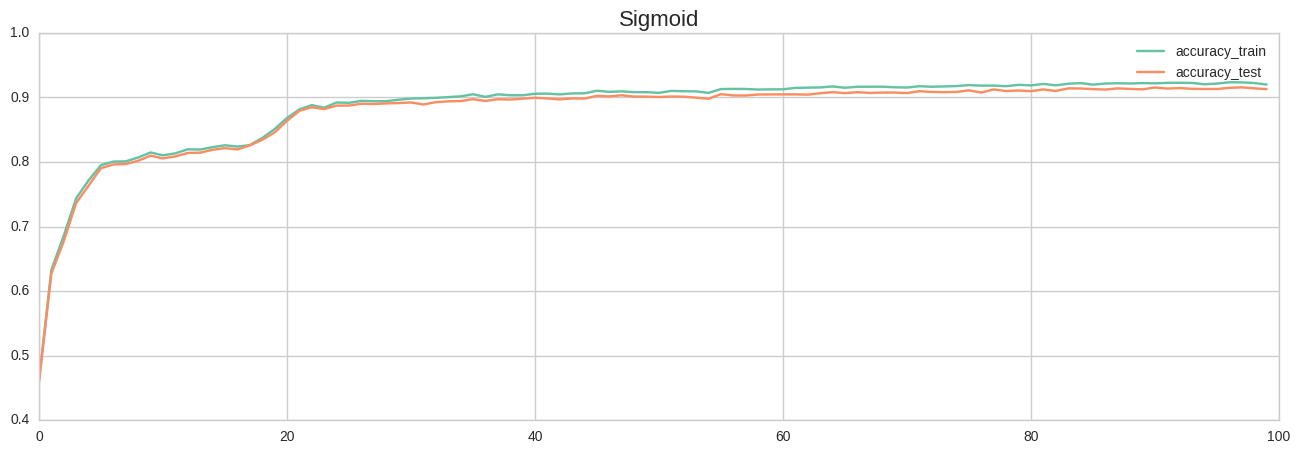

In [53]:
plt.figure(figsize=(16, 5))
plt.plot(range(len(accuracy_train_sigmoid)), accuracy_train_sigmoid, label = 'accuracy_train')
plt.plot(range(len(accuracy_test_sigmoid)), accuracy_test_sigmoid, label = 'accuracy_test')
plt.title('Sigmoid', fontsize = 16)
plt.legend()
plt.show()

#### Accuracy на уровне 91% (почти как с MSE)

#### Tanh:

In [56]:
N, D1, D2, D3 = batch_size, X.shape[1], 50, Y.shape[1]
dtype = torch.FloatTensor

# Опишем переменные для проверки accuracy:
x_test = Variable(torch.from_numpy(X_test).type(dtype), requires_grad = False)
y_test = Variable(torch.from_numpy(Y_test).type(dtype), requires_grad = False)

model = torch.nn.Sequential(
          torch.nn.Linear(D1, D2),
          torch.nn.Tanh(),
          torch.nn.Linear(D2, D3),
          torch.nn.Softmax(),
        )
loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4

loss_avg = 0
losses = []
gradients = []
accuracy_test = []
accuracy_train = []

for t in range(100):
    grad_w1 = 0
    grad_b1 = 0
    grad_w2 = 0
    grad_b2 = 0
    X_train, Y_train = shuffle(X_train, Y_train)
    x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
    y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

    for b in xrange(n_batches):
        x = Variable(torch.from_numpy(X_train[b : b + batch_size, :]).type(dtype), requires_grad = False)
        y = Variable(torch.from_numpy(np.argmax(Y_train[b : b + batch_size, :], 1)).type(torch.LongTensor), requires_grad = False)
        y_pred = model(x)
        
        loss = loss_fn(input = y_pred, target = y)
        loss_avg += loss.data
        
        grad_w1 += list(model[0].parameters())[0].grad.data.norm()
        grad_b1 += list(model[0].parameters())[1].grad.data.norm()
        grad_w2 += list(model[2].parameters())[0].grad.data.norm()
        grad_b2 += list(model[2].parameters())[1].grad.data.norm()
        
        model.zero_grad()
        loss.backward()
        
        for param in model.parameters():
            param.data -= learning_rate * param.grad.data
        
        del x, y
        
    gradients.append((grad_w1 / n_batches, grad_w2 / n_batches, grad_b1 / n_batches, grad_b2 / n_batches))
    losses.append(loss_avg[0])
    y_test_pred = make_label(model(x_test).data.numpy())
    y_train_pred = make_label(model(x_train).data.numpy())
    acc_test = accuracy(np.argmax(Y_test, 1), y_test_pred)
    accuracy_test.append(acc_test)
    acc_train = accuracy(np.argmax(Y_train, 1), y_train_pred)
    accuracy_train.append(acc_train)
    
    print ("%d, %.4f, %.4f" % (t, loss_avg[0] / batch_size, acc_test))
    loss_avg = 0

0, 3015.8766, 0.5336
1, 2663.1172, 0.6817
2, 2462.8003, 0.7734
3, 2370.3748, 0.8182
4, 2320.5970, 0.8331
5, 2311.8098, 0.8471
6, 2258.7925, 0.8511
7, 2264.2569, 0.8586
8, 2242.2692, 0.8568
9, 2226.9159, 0.8666
10, 2226.8373, 0.8609
11, 2242.3008, 0.8681
12, 2227.2498, 0.8724
13, 2231.1312, 0.8729
14, 2201.1309, 0.8779
15, 2206.9364, 0.8774
16, 2205.2083, 0.8726
17, 2202.3247, 0.8764
18, 2196.7741, 0.8831
19, 2196.0270, 0.8774
20, 2202.6989, 0.8838
21, 2191.8891, 0.8806
22, 2195.7598, 0.8837
23, 2202.4017, 0.8805
24, 2190.5273, 0.8791
25, 2188.5563, 0.8789
26, 2205.6914, 0.8822
27, 2185.9766, 0.8846
28, 2191.8831, 0.8844
29, 2187.7114, 0.8886
30, 2177.3723, 0.8901
31, 2192.7584, 0.8900
32, 2186.3406, 0.8882
33, 2176.7144, 0.8904
34, 2183.6252, 0.8880
35, 2192.7786, 0.8934
36, 2190.4034, 0.8944
37, 2181.5156, 0.8878
38, 2187.8230, 0.8956
39, 2179.3377, 0.8939
40, 2189.2361, 0.8964
41, 2182.6059, 0.8963
42, 2188.6602, 0.8879
43, 2179.4323, 0.8937
44, 2170.3867, 0.8937
45, 2184.7552, 0.894

In [57]:
loss_tanh = losses
accuracy_train_tanh = accuracy_train
accuracy_test_tanh = accuracy_test

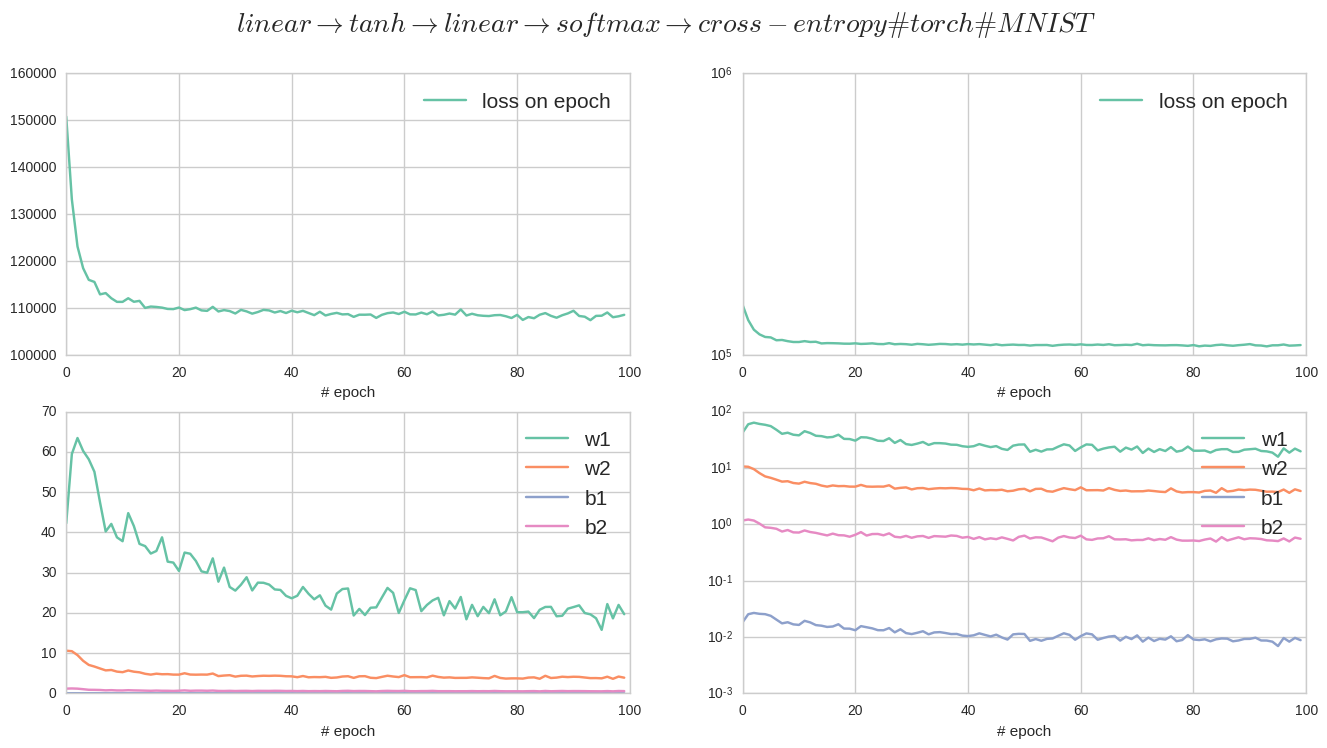

In [58]:
plot_results(losses, gradients, '$linear \\rightarrow tanh \\rightarrow linear \\rightarrow softmax \\rightarrow cross-entropy \# torch \# MNIST$')

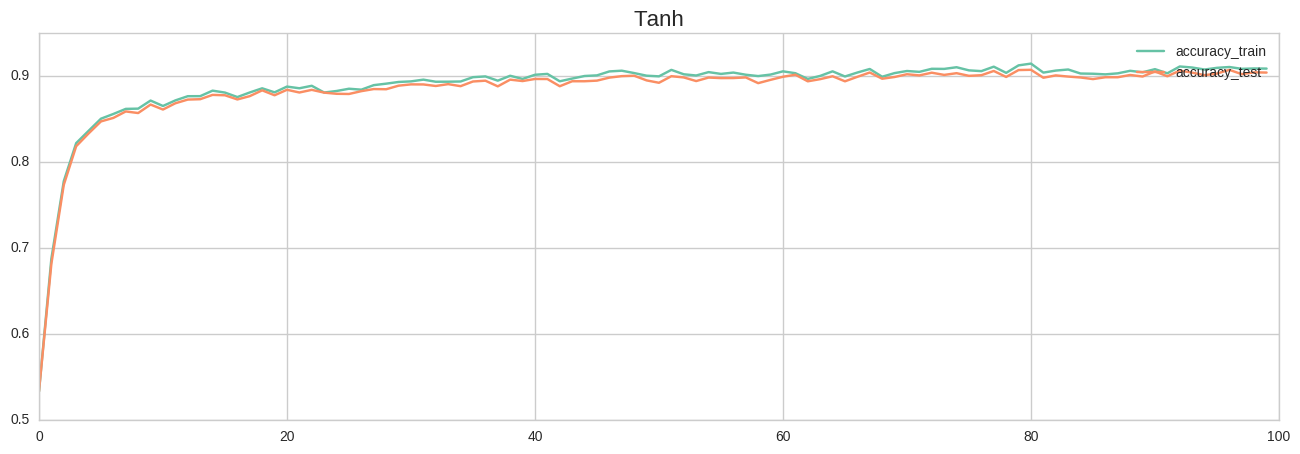

In [59]:
plt.figure(figsize=(16, 5))
plt.plot(range(len(accuracy_train_tanh)), accuracy_train_tanh, label = 'accuracy_train')
plt.plot(range(len(accuracy_test_tanh)), accuracy_test_tanh, label = 'accuracy_test')
plt.title('Tanh', fontsize = 16)
plt.legend()
plt.show()

#### Точность подросла на 5-6% по сравнению с MSE.

#### ReLU:

In [15]:
N, D1, D2, D3 = batch_size, X.shape[1], 50, Y.shape[1]
dtype = torch.FloatTensor

# Опишем переменные для проверки accuracy:
x_test = Variable(torch.from_numpy(X_test).type(dtype), requires_grad = False)
y_test = Variable(torch.from_numpy(Y_test).type(dtype), requires_grad = False)
x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

model = torch.nn.Sequential(
          torch.nn.Linear(D1, D2),
          torch.nn.ReLU(),
          torch.nn.Linear(D2, D3),
          torch.nn.Softmax(),
        )
loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4

loss_avg = 0
losses = []
gradients = []
accuracy_test = []
accuracy_train = []

for t in range(100):
    grad_w1 = 0
    grad_b1 = 0
    grad_w2 = 0
    grad_b2 = 0
    X_train, Y_train = shuffle(X_train, Y_train)
    x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
    y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

    for b in xrange(n_batches):
        x = Variable(torch.from_numpy(X_train[b : b + batch_size, :]).type(dtype), requires_grad = False)
        y = Variable(torch.from_numpy(np.argmax(Y_train[b : b + batch_size, :], 1)).type(torch.LongTensor), requires_grad = False)
        y_pred = model(x)
        
        loss = loss_fn(input = y_pred, target = y)
        loss_avg += loss.data
        
        grad_w1 += list(model[0].parameters())[0].grad.data.norm()
        grad_b1 += list(model[0].parameters())[1].grad.data.norm()
        grad_w2 += list(model[2].parameters())[0].grad.data.norm()
        grad_b2 += list(model[2].parameters())[1].grad.data.norm()
        
        model.zero_grad()
        loss.backward()
        
        for param in model.parameters():
            param.data -= learning_rate * param.grad.data
        
        del x, y
        
    gradients.append((grad_w1 / n_batches, grad_w2 / n_batches, grad_b1 / n_batches, grad_b2 / n_batches))
    losses.append(loss_avg[0] / batch_size)
    y_test_pred = make_label(model(x_test).data.numpy())
    y_train_pred = make_label(model(x_train).data.numpy())
    acc_test = accuracy(np.argmax(Y_test, 1), y_test_pred)
    accuracy_test.append(acc_test)
    acc_train = accuracy(np.argmax(Y_train, 1), y_train_pred)
    accuracy_train.append(acc_train)
    
    print ("%d, %.4f, %.4f" % (t, loss_avg[0] / batch_size, acc_test))
    loss_avg = 0

0, 2774.2553, 0.5448
1, 2449.6122, 0.6484
2, 2405.3331, 0.6641
3, 2412.0873, 0.6974
4, 2417.5333, 0.7071
5, 2382.6977, 0.7224
6, 2317.6611, 0.7511
7, 2243.5770, 0.8001
8, 2251.2069, 0.8085
9, 2255.8403, 0.8041
10, 2285.0789, 0.8037
11, 2251.9697, 0.8086
12, 2233.3027, 0.8147
13, 2275.5777, 0.8223
14, 2237.2928, 0.8171
15, 2247.1761, 0.8176
16, 2243.0792, 0.8119
17, 2232.1541, 0.8252
18, 2216.2297, 0.8709
19, 2137.3566, 0.8715
20, 2118.9350, 0.8986
21, 2119.9480, 0.9004
22, 2115.6192, 0.8997
23, 2117.8489, 0.8985
24, 2115.9114, 0.9105
25, 2121.3306, 0.9000
26, 2105.5441, 0.9081
27, 2120.5778, 0.9139
28, 2111.5950, 0.9059
29, 2115.6402, 0.9101
30, 2122.4744, 0.9077
31, 2113.5684, 0.9129
32, 2112.2761, 0.9189
33, 2116.5305, 0.9058
34, 2113.1347, 0.9101
35, 2117.3970, 0.9188
36, 2120.6145, 0.9096
37, 2105.9191, 0.9182
38, 2109.5820, 0.9076
39, 2109.8942, 0.9168
40, 2115.0309, 0.9196
41, 2109.4608, 0.9168
42, 2111.0338, 0.9217
43, 2110.2931, 0.9248
44, 2120.8284, 0.9022
45, 2104.1667, 0.917

In [16]:
loss_relu_50 = losses
accuracy_train_relu_50 = accuracy_train
accuracy_test_relu_50 = accuracy_test

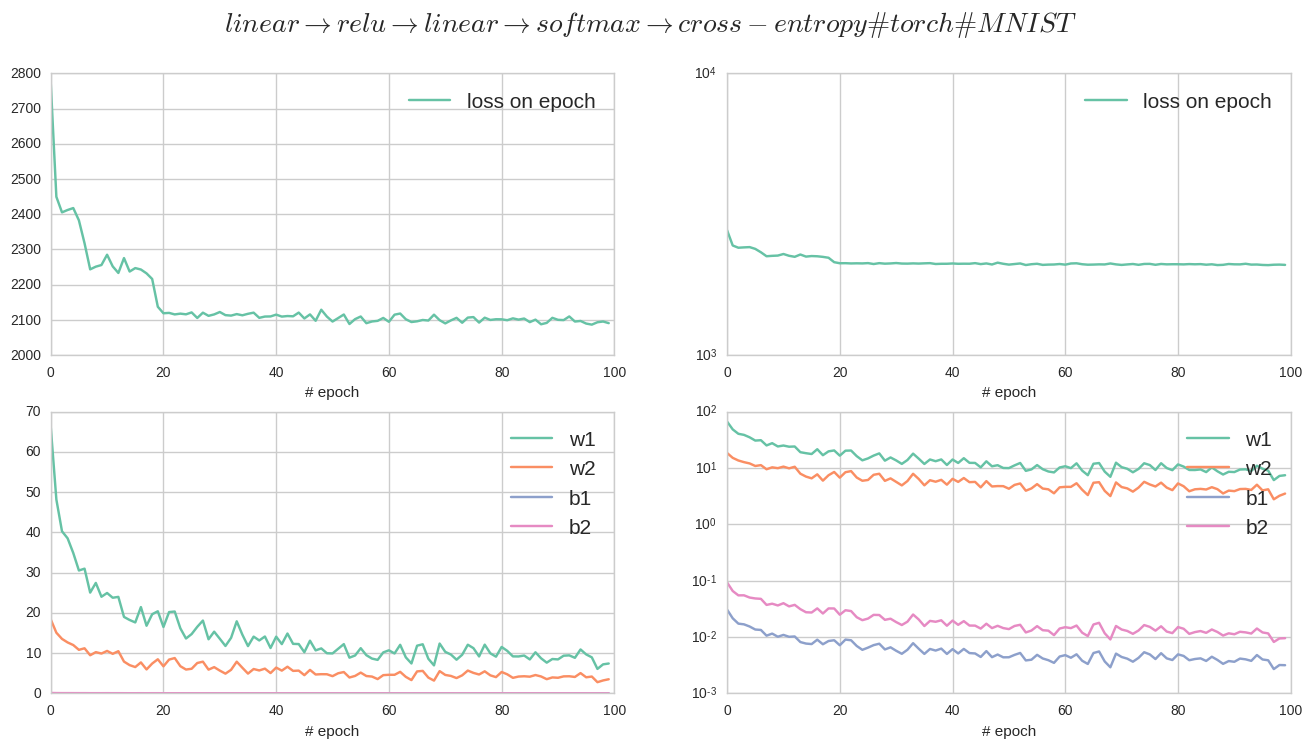

In [17]:
plot_results(losses, gradients, '$linear \\rightarrow relu \\rightarrow linear \\rightarrow softmax \\rightarrow cross-entropy \# torch \# MNIST$')

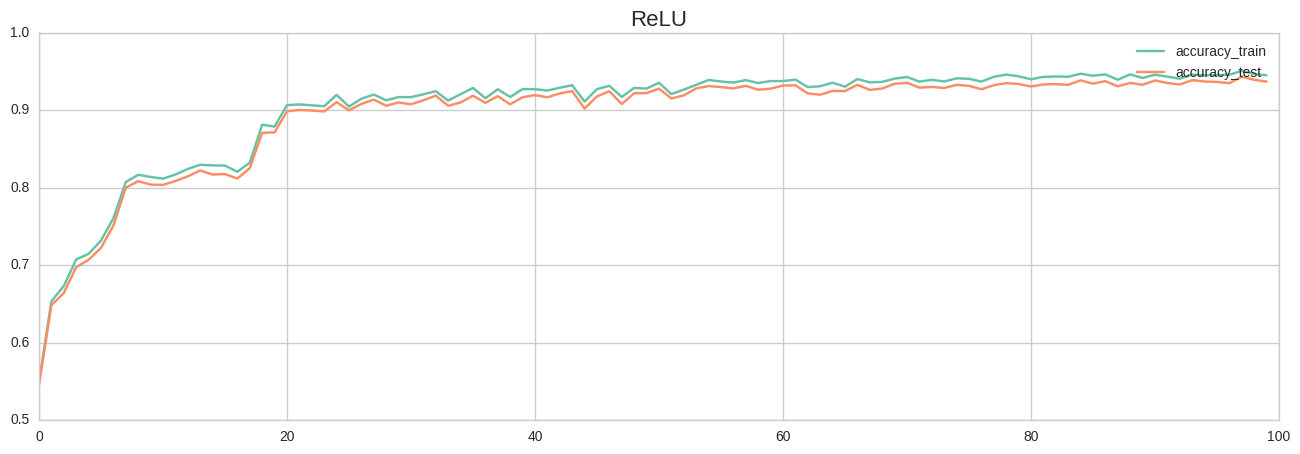

In [19]:
plt.figure(figsize=(16, 5))
plt.plot(range(len(accuracy_train_relu_50)), accuracy_train_relu_50, label = 'accuracy_train')
plt.plot(range(len(accuracy_test_relu_50)), accuracy_test_relu_50, label = 'accuracy_test')
plt.title('ReLU', fontsize = 16)
plt.legend()
plt.show()

#### ReLU с кросс-энтропией дают точность на тесте больше 93%.  При этом, на последних эпохах наблюдается определенный рост. Возможно, имеет смысл в дальнейшем увеличить число эпох для обучения.

# III. Архитектура сети

#### Оставим в качестве активации ReLU, в качестве функции потерь - кросс-энтропию. Теперь попробуем покрутить архитектуру сети. Для начала, не меняя числа слоёв, попробуем разное число нейронов на скрытом слое: 10, 50 (было выше), 100, 300.

#### Hidden ~ 10:

In [23]:
N, D1, D2, D3 = batch_size, X.shape[1], 10, Y.shape[1]
dtype = torch.FloatTensor

# Опишем переменные для проверки accuracy:
x_test = Variable(torch.from_numpy(X_test).type(dtype), requires_grad = False)
y_test = Variable(torch.from_numpy(Y_test).type(dtype), requires_grad = False)
x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

model = torch.nn.Sequential(
          torch.nn.Linear(D1, D2),
          torch.nn.ReLU(),
          torch.nn.Linear(D2, D3),
          torch.nn.Softmax(),
        )
loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4

loss_avg = 0
losses = []
gradients = []
accuracy_test = []
accuracy_train = []

for t in range(100):
    grad_w1 = 0
    grad_b1 = 0
    grad_w2 = 0
    grad_b2 = 0
    X_train, Y_train = shuffle(X_train, Y_train)
    x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
    y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

    for b in xrange(n_batches):
        x = Variable(torch.from_numpy(X_train[b : b + batch_size, :]).type(dtype), requires_grad = False)
        y = Variable(torch.from_numpy(np.argmax(Y_train[b : b + batch_size, :], 1)).type(torch.LongTensor), requires_grad = False)
        y_pred = model(x)
        
        loss = loss_fn(input = y_pred, target = y)
        loss_avg += loss.data
        
        grad_w1 += list(model[0].parameters())[0].grad.data.norm()
        grad_b1 += list(model[0].parameters())[1].grad.data.norm()
        grad_w2 += list(model[2].parameters())[0].grad.data.norm()
        grad_b2 += list(model[2].parameters())[1].grad.data.norm()
        
        model.zero_grad()
        loss.backward()
        
        for param in model.parameters():
            param.data -= learning_rate * param.grad.data
        
        del x, y
        
    gradients.append((grad_w1 / n_batches, grad_w2 / n_batches, grad_b1 / n_batches, grad_b2 / n_batches))
    losses.append(loss_avg[0] / batch_size)
    y_test_pred = make_label(model(x_test).data.numpy())
    y_train_pred = make_label(model(x_train).data.numpy())
    acc_test = accuracy(np.argmax(Y_test, 1), y_test_pred)
    accuracy_test.append(acc_test)
    acc_train = accuracy(np.argmax(Y_train, 1), y_train_pred)
    accuracy_train.append(acc_train)
    
    print ("%d, %.4f, %.4f" % (t, loss_avg[0] / batch_size, acc_test))
    loss_avg = 0

0, 2586.5328, 0.5649
1, 2402.3733, 0.6777
2, 2384.8942, 0.6996
3, 2345.3539, 0.7231
4, 2340.1295, 0.7088
5, 2340.9478, 0.7951
6, 2318.5459, 0.7934
7, 2318.6863, 0.8100
8, 2287.1570, 0.8165
9, 2312.1956, 0.8091
10, 2301.2369, 0.8281
11, 2292.4403, 0.8286
12, 2282.7095, 0.8249
13, 2282.8034, 0.8455
14, 2303.0825, 0.8415
15, 2285.9575, 0.8421
16, 2285.7631, 0.8480
17, 2294.7523, 0.8450
18, 2275.9798, 0.8539
19, 2251.8620, 0.8568
20, 2277.1067, 0.8541
21, 2241.7805, 0.8512
22, 2246.0017, 0.8576
23, 2266.9302, 0.8590
24, 2234.6798, 0.8568
25, 2235.8820, 0.8577
26, 2225.6934, 0.8610
27, 2224.8427, 0.8616
28, 2233.0173, 0.8649
29, 2237.7384, 0.8639
30, 2203.8383, 0.8636
31, 2219.2042, 0.8658
32, 2204.1094, 0.8503
33, 2205.6520, 0.8691
34, 2208.1062, 0.8610
35, 2206.7255, 0.8656
36, 2183.6259, 0.8551
37, 2196.2208, 0.8705
38, 2217.9659, 0.8588
39, 2186.5091, 0.8605
40, 2206.7500, 0.8434
41, 2210.0109, 0.8711
42, 2197.6673, 0.8617
43, 2176.8042, 0.8701
44, 2198.7202, 0.8696
45, 2193.0280, 0.868

In [24]:
loss_relu_10 = losses
accuracy_train_relu_10 = accuracy_train
accuracy_test_relu_10 = accuracy_test

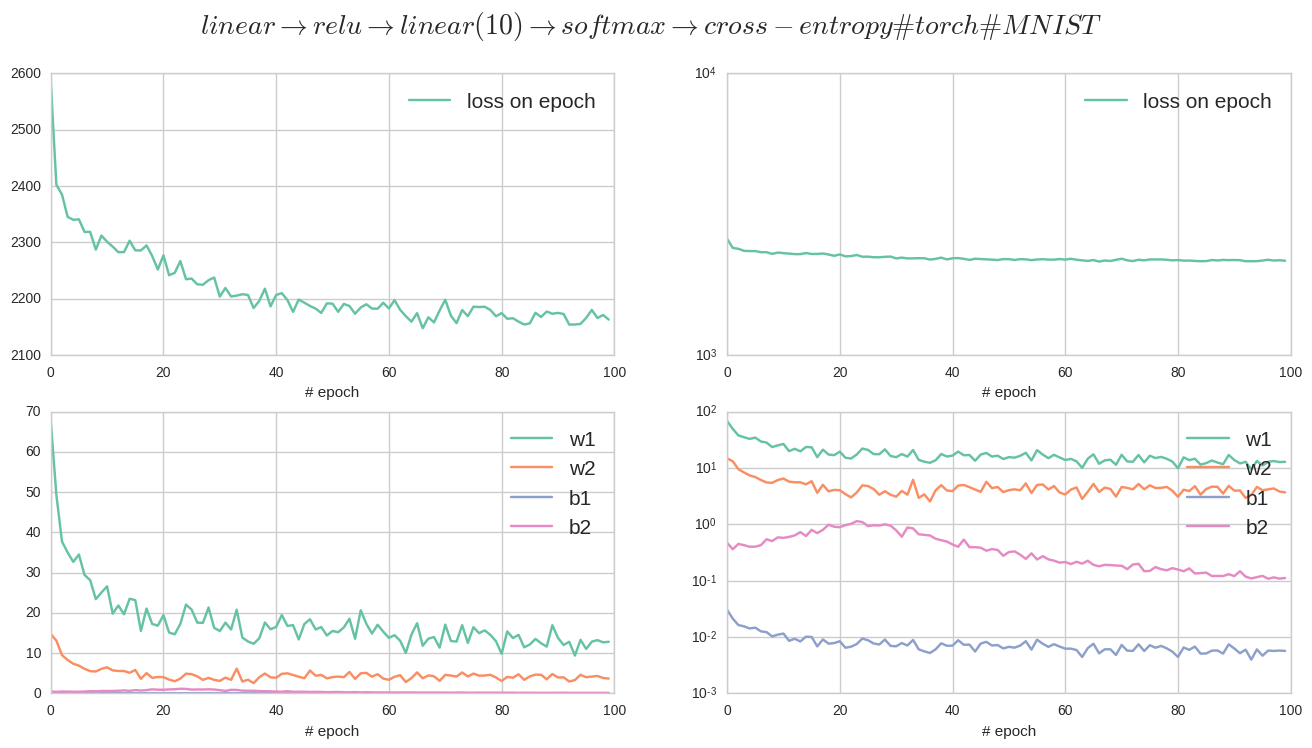

In [25]:
plot_results(losses, gradients, '$linear \\rightarrow relu \\rightarrow linear(10) \\rightarrow softmax \\rightarrow cross-entropy \# torch \# MNIST$')

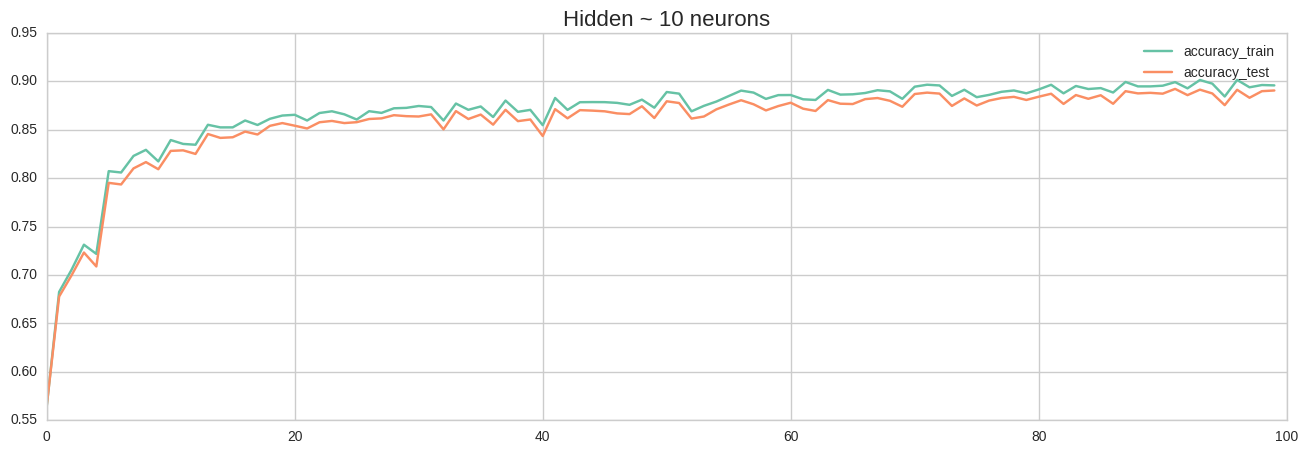

In [26]:
plt.figure(figsize=(16, 5))
plt.plot(range(len(accuracy_train_relu_10)), accuracy_train_relu_10, label = 'accuracy_train')
plt.plot(range(len(accuracy_test_relu_10)), accuracy_test_relu_10, label = 'accuracy_test')
plt.title('Hidden ~ 10 neurons', fontsize = 16)
plt.legend()
plt.show()

#### Hidden ~ 100:

In [28]:
N, D1, D2, D3 = batch_size, X.shape[1], 100, Y.shape[1]
dtype = torch.FloatTensor

# Опишем переменные для проверки accuracy:
x_test = Variable(torch.from_numpy(X_test).type(dtype), requires_grad = False)
y_test = Variable(torch.from_numpy(Y_test).type(dtype), requires_grad = False)
x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

model = torch.nn.Sequential(
          torch.nn.Linear(D1, D2),
          torch.nn.ReLU(),
          torch.nn.Linear(D2, D3),
          torch.nn.Softmax(),
        )
loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4

loss_avg = 0
losses = []
gradients = []
accuracy_test = []
accuracy_train = []

for t in range(100):
    grad_w1 = 0
    grad_b1 = 0
    grad_w2 = 0
    grad_b2 = 0
    X_train, Y_train = shuffle(X_train, Y_train)
    x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
    y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

    for b in xrange(n_batches):
        x = Variable(torch.from_numpy(X_train[b : b + batch_size, :]).type(dtype), requires_grad = False)
        y = Variable(torch.from_numpy(np.argmax(Y_train[b : b + batch_size, :], 1)).type(torch.LongTensor), requires_grad = False)
        y_pred = model(x)
        
        loss = loss_fn(input = y_pred, target = y)
        loss_avg += loss.data
        
        grad_w1 += list(model[0].parameters())[0].grad.data.norm()
        grad_b1 += list(model[0].parameters())[1].grad.data.norm()
        grad_w2 += list(model[2].parameters())[0].grad.data.norm()
        grad_b2 += list(model[2].parameters())[1].grad.data.norm()
        
        model.zero_grad()
        loss.backward()
        
        for param in model.parameters():
            param.data -= learning_rate * param.grad.data
        
        del x, y
        
    gradients.append((grad_w1 / n_batches, grad_w2 / n_batches, grad_b1 / n_batches, grad_b2 / n_batches))
    losses.append(loss_avg[0] / batch_size)
    y_test_pred = make_label(model(x_test).data.numpy())
    y_train_pred = make_label(model(x_train).data.numpy())
    acc_test = accuracy(np.argmax(Y_test, 1), y_test_pred)
    accuracy_test.append(acc_test)
    acc_train = accuracy(np.argmax(Y_train, 1), y_train_pred)
    accuracy_train.append(acc_train)
    
    print ("%d, %.4f, %.4f" % (t, loss_avg[0] / batch_size, acc_test))
    loss_avg = 0

0, 2786.2441, 0.4946
1, 2689.6878, 0.5366
2, 2643.8288, 0.5448
3, 2632.1600, 0.5541
4, 2630.0344, 0.5850
5, 2555.5887, 0.6405
6, 2343.3056, 0.7610
7, 2185.6469, 0.8519
8, 2147.0381, 0.8829
9, 2149.3586, 0.8779
10, 2147.3161, 0.8926
11, 2128.2139, 0.8940
12, 2124.6737, 0.8819
13, 2130.1255, 0.9052
14, 2138.1756, 0.8930
15, 2139.6753, 0.9033
16, 2122.2111, 0.9098
17, 2117.6561, 0.9143
18, 2122.2517, 0.9201
19, 2117.8025, 0.8943
20, 2104.2741, 0.9156
21, 2114.0833, 0.9159
22, 2115.5116, 0.9129
23, 2106.3500, 0.9124
24, 2115.0258, 0.9180
25, 2107.9820, 0.9244
26, 2107.0608, 0.9244
27, 2090.5448, 0.9119
28, 2105.1067, 0.9242
29, 2099.4236, 0.9264
30, 2098.2775, 0.9163
31, 2108.9042, 0.9244
32, 2096.9498, 0.9304
33, 2093.1953, 0.9304
34, 2115.0786, 0.9261
35, 2097.9091, 0.9206
36, 2097.7756, 0.9324
37, 2105.3750, 0.9269
38, 2098.5555, 0.9271
39, 2091.6584, 0.9351
40, 2104.1595, 0.9264
41, 2109.8075, 0.9283
42, 2089.4075, 0.9335
43, 2099.7305, 0.9311
44, 2087.5216, 0.9387
45, 2099.4566, 0.937

In [29]:
loss_relu_100 = losses
accuracy_train_relu_100 = accuracy_train
accuracy_test_relu_100 = accuracy_test

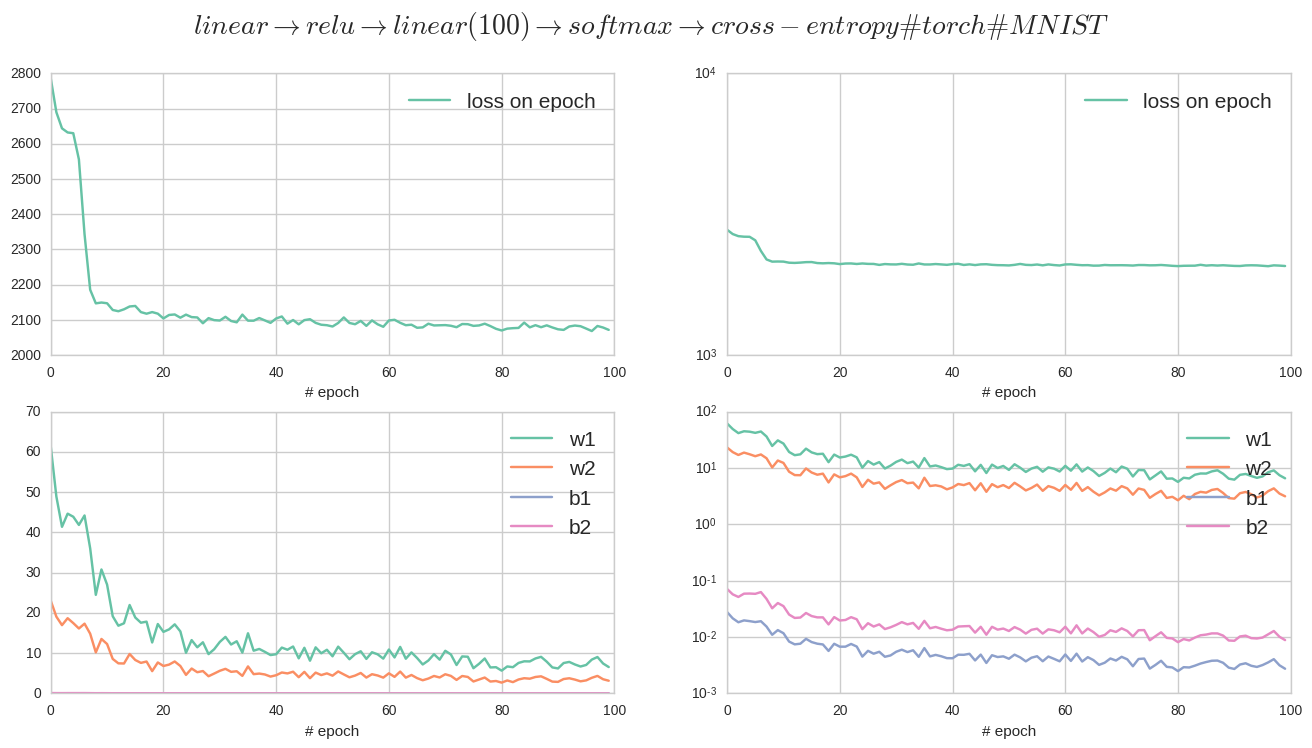

In [30]:
plot_results(losses, gradients, '$linear \\rightarrow relu \\rightarrow linear(100) \\rightarrow softmax \\rightarrow cross-entropy \# torch \# MNIST$')

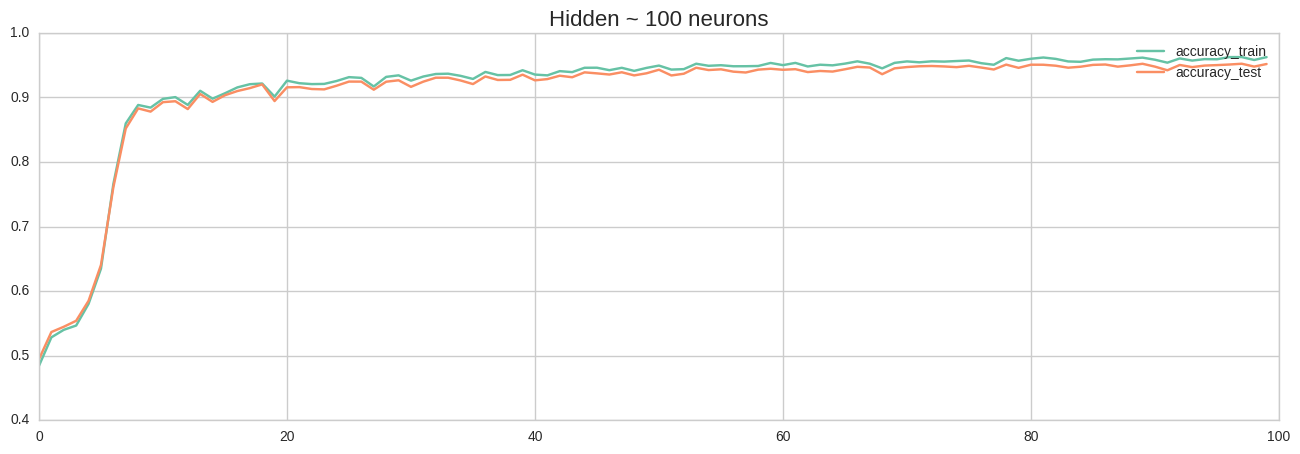

In [31]:
plt.figure(figsize=(16, 5))
plt.plot(range(len(accuracy_train_relu_100)), accuracy_train_relu_100, label = 'accuracy_train')
plt.plot(range(len(accuracy_test_relu_100)), accuracy_test_relu_100, label = 'accuracy_test')
plt.title('Hidden ~ 100 neurons', fontsize = 16)
plt.legend()
plt.show()

#### Hidden ~ 300:

In [33]:
N, D1, D2, D3 = batch_size, X.shape[1], 300, Y.shape[1]
dtype = torch.FloatTensor

# Опишем переменные для проверки accuracy:
x_test = Variable(torch.from_numpy(X_test).type(dtype), requires_grad = False)
y_test = Variable(torch.from_numpy(Y_test).type(dtype), requires_grad = False)
x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

model = torch.nn.Sequential(
          torch.nn.Linear(D1, D2),
          torch.nn.ReLU(),
          torch.nn.Linear(D2, D3),
          torch.nn.Softmax(),
        )
loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4

loss_avg = 0
losses = []
gradients = []
accuracy_test = []
accuracy_train = []

for t in range(100):
    grad_w1 = 0
    grad_b1 = 0
    grad_w2 = 0
    grad_b2 = 0
    X_train, Y_train = shuffle(X_train, Y_train)
    x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
    y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

    for b in xrange(n_batches):
        x = Variable(torch.from_numpy(X_train[b : b + batch_size, :]).type(dtype), requires_grad = False)
        y = Variable(torch.from_numpy(np.argmax(Y_train[b : b + batch_size, :], 1)).type(torch.LongTensor), requires_grad = False)
        y_pred = model(x)
        
        loss = loss_fn(input = y_pred, target = y)
        loss_avg += loss.data
        
        grad_w1 += list(model[0].parameters())[0].grad.data.norm()
        grad_b1 += list(model[0].parameters())[1].grad.data.norm()
        grad_w2 += list(model[2].parameters())[0].grad.data.norm()
        grad_b2 += list(model[2].parameters())[1].grad.data.norm()
        
        model.zero_grad()
        loss.backward()
        
        for param in model.parameters():
            param.data -= learning_rate * param.grad.data
        
        del x, y
        
    gradients.append((grad_w1 / n_batches, grad_w2 / n_batches, grad_b1 / n_batches, grad_b2 / n_batches))
    losses.append(loss_avg[0] / batch_size)
    y_test_pred = make_label(model(x_test).data.numpy())
    y_train_pred = make_label(model(x_train).data.numpy())
    acc_test = accuracy(np.argmax(Y_test, 1), y_test_pred)
    accuracy_test.append(acc_test)
    acc_train = accuracy(np.argmax(Y_train, 1), y_train_pred)
    accuracy_train.append(acc_train)
    
    print ("%d, %.4f, %.4f" % (t, loss_avg[0] / batch_size, acc_test))
    loss_avg = 0

0, 2760.9772, 0.5056
1, 2644.1725, 0.5264
2, 2644.7597, 0.5347
3, 2635.7953, 0.5500
4, 2642.7325, 0.6205
5, 2533.3098, 0.6086
6, 2516.8734, 0.6439
7, 2401.7347, 0.7182
8, 2360.5061, 0.7083
9, 2380.4317, 0.7295
10, 2356.3772, 0.7326
11, 2365.0786, 0.7297
12, 2388.4064, 0.7303
13, 2315.6617, 0.8009
14, 2262.2375, 0.8136
15, 2239.7745, 0.8217
16, 2226.8827, 0.8264
17, 2275.1714, 0.8291
18, 2250.3120, 0.8292
19, 2217.7147, 0.8369
20, 2169.4780, 0.8836
21, 2124.6630, 0.8950
22, 2110.6078, 0.8964
23, 2110.3377, 0.9130
24, 2105.1323, 0.9123
25, 2106.6438, 0.9121
26, 2106.1167, 0.9159
27, 2109.6009, 0.9228
28, 2093.8886, 0.9289
29, 2095.5330, 0.9287
30, 2109.5055, 0.9296
31, 2101.4633, 0.9288
32, 2089.4669, 0.9231
33, 2098.3575, 0.9192
34, 2103.8022, 0.9276
35, 2105.6281, 0.9284
36, 2102.1592, 0.9243
37, 2092.9086, 0.9367
38, 2105.5181, 0.9314
39, 2081.3208, 0.9241
40, 2090.3775, 0.9356
41, 2090.7337, 0.9359
42, 2091.9758, 0.9320
43, 2092.7211, 0.9316
44, 2092.7914, 0.9392
45, 2093.2872, 0.941

In [34]:
loss_relu_300 = losses
accuracy_train_relu_300 = accuracy_train
accuracy_test_relu_300 = accuracy_test

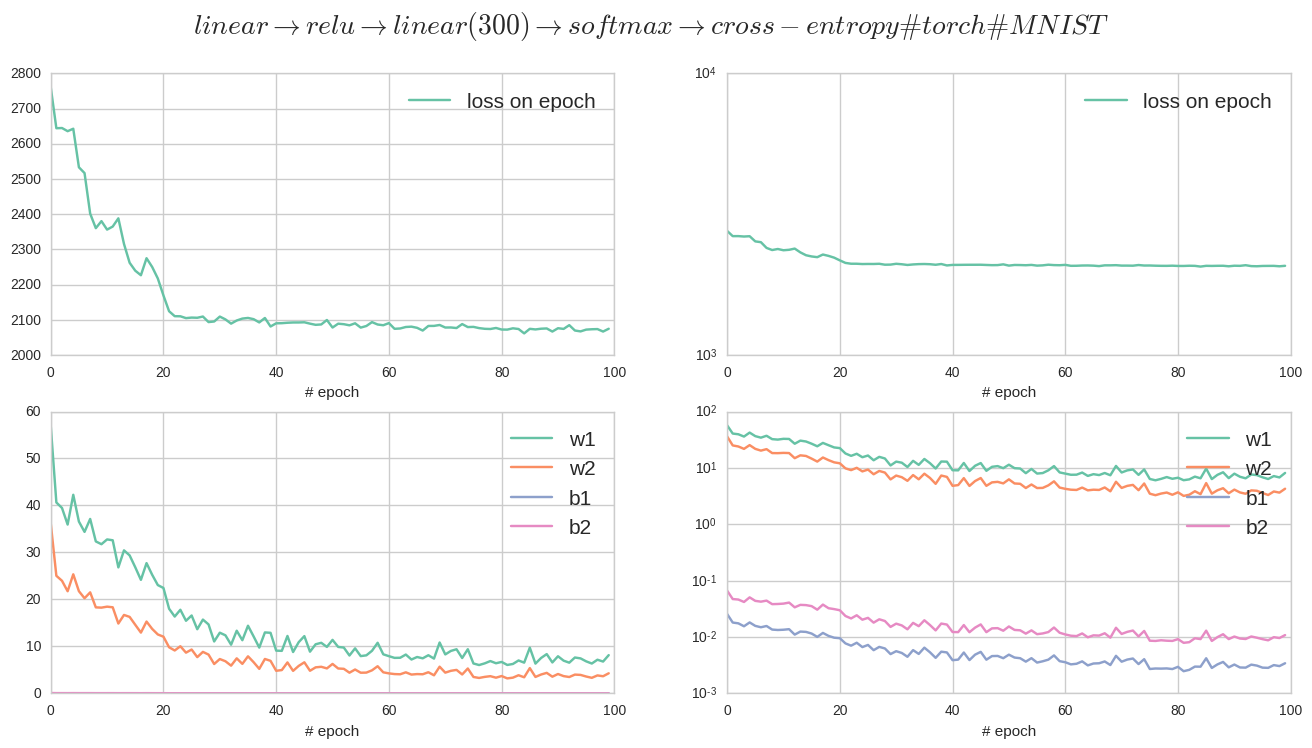

In [35]:
plot_results(losses, gradients, '$linear \\rightarrow relu \\rightarrow linear(300) \\rightarrow softmax \\rightarrow cross-entropy \# torch \# MNIST$')

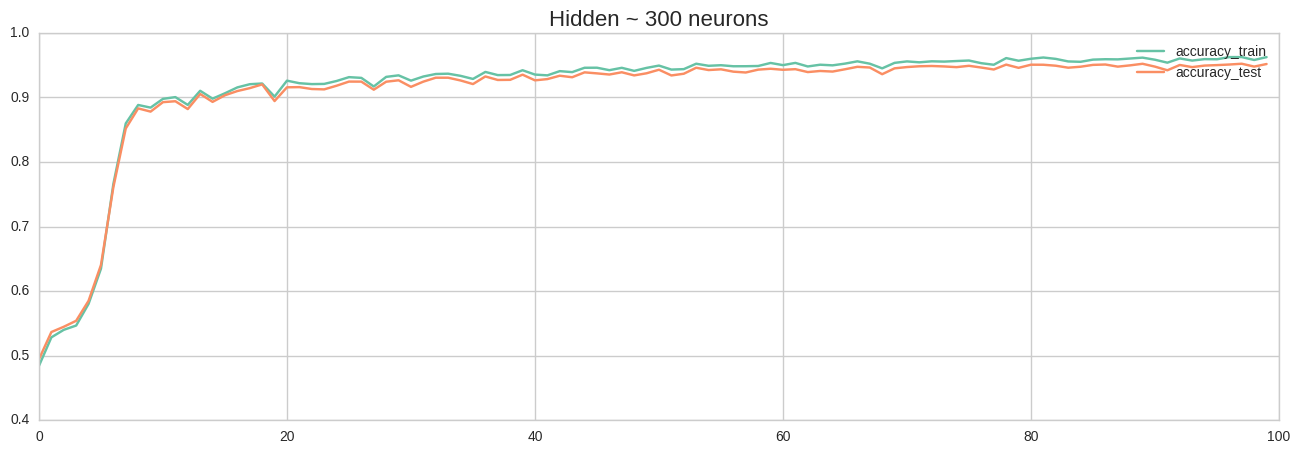

In [36]:
plt.figure(figsize=(16, 5))
plt.plot(range(len(accuracy_train_relu_100)), accuracy_train_relu_100, label = 'accuracy_train')
plt.plot(range(len(accuracy_test_relu_100)), accuracy_test_relu_100, label = 'accuracy_test')
plt.title('Hidden ~ 300 neurons', fontsize = 16)
plt.legend()
plt.show()

#### Сравним, как ведyт себя loss и accuracy во время обучения при разных размерах скрытого слоя:

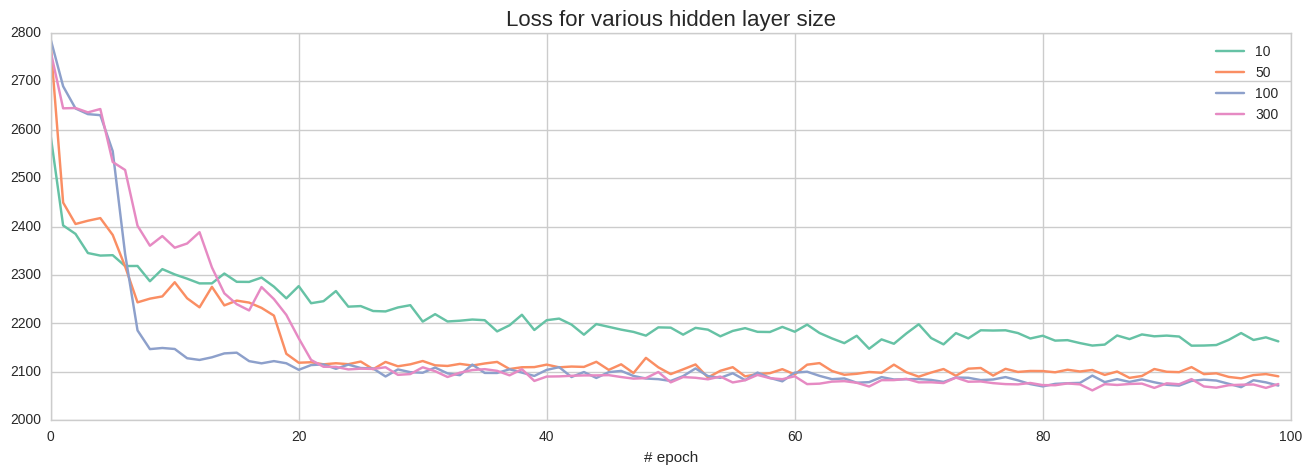

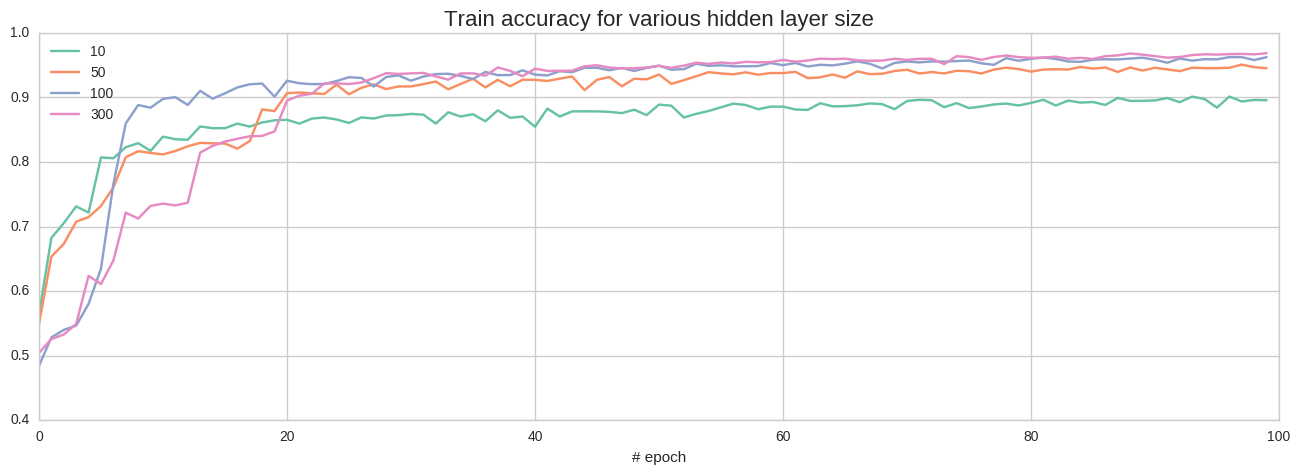

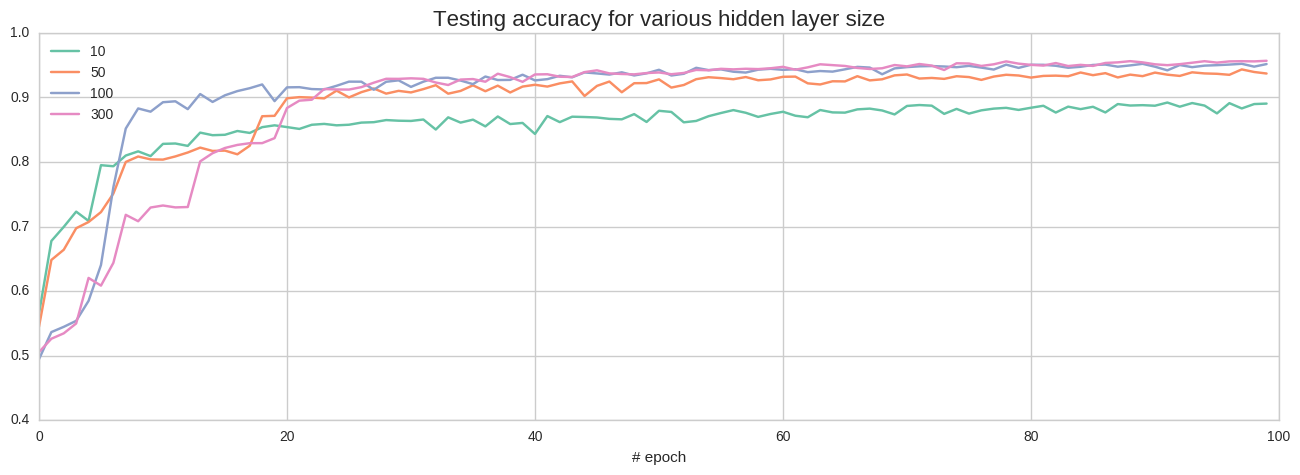

In [38]:
epochs = range(100)
plt.figure(figsize=(16, 5))
plt.plot(epochs, loss_relu_10, label = '10')
plt.plot(epochs, loss_relu_50, label = '50')
plt.plot(epochs, loss_relu_100, label = '100')
plt.plot(epochs, loss_relu_300, label = '300')
plt.title('Loss for various hidden layer size', fontsize = 16)
plt.xlabel('# epoch')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(epochs, accuracy_train_relu_10, label = '10')
plt.plot(epochs, accuracy_train_relu_50, label = '50')
plt.plot(epochs, accuracy_train_relu_100, label = '100')
plt.plot(epochs, accuracy_train_relu_300, label = '300')
plt.title('Train accuracy for various hidden layer size', fontsize = 16)
plt.xlabel('# epoch')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(epochs, accuracy_test_relu_10, label = '10')
plt.plot(epochs, accuracy_test_relu_50, label = '50')
plt.plot(epochs, accuracy_test_relu_100, label = '100')
plt.plot(epochs, accuracy_test_relu_300, label = '300')
plt.title('Testing accuracy for various hidden layer size', fontsize = 16)
plt.xlabel('# epoch')
plt.legend(loc='best')
plt.show()

#### Получаем, что быстрее всего сходится архитектура со скрытым слоем размера 100. При этом, добавление еще 200 нейронов не улучшает ни скорость сходимости, ни качество обучения.

In [41]:
loss_relu_2_layers = losses
accuracy_train_relu_2_layers = accuracy_train
accuracy_test_relu_2_layers = accuracy_test

#### Теперь попробуем увеличивать количество скрытых линейных слоев. 3-слойная сеть (784, 100, 50, 10):

In [43]:
N, D1, D2, D3, D4 = batch_size, X.shape[1], 100, 50, Y.shape[1]
dtype = torch.FloatTensor

# Опишем переменные для проверки accuracy:
x_test = Variable(torch.from_numpy(X_test).type(dtype), requires_grad = False)
y_test = Variable(torch.from_numpy(Y_test).type(dtype), requires_grad = False)
x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

model = torch.nn.Sequential(
          torch.nn.Linear(D1, D2),
          torch.nn.ReLU(),
          torch.nn.Linear(D2, D3), 
          torch.nn.ReLU(),
          torch.nn.Linear(D3, D4),
          torch.nn.Softmax(),
        )
loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4

loss_avg = 0
losses = []
gradients = []
accuracy_test = []
accuracy_train = []

for t in range(100):
    grad_w1 = 0
    grad_b1 = 0
    grad_w2 = 0
    grad_b2 = 0
    grad_w3 = 0
    grad_b3 = 0
    X_train, Y_train = shuffle(X_train, Y_train)
    x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
    y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

    for b in xrange(n_batches):
        x = Variable(torch.from_numpy(X_train[b : b + batch_size, :]).type(dtype), requires_grad = False)
        y = Variable(torch.from_numpy(np.argmax(Y_train[b : b + batch_size, :], 1)).type(torch.LongTensor), requires_grad = False)
        y_pred = model(x)
        
        loss = loss_fn(input = y_pred, target = y)
        loss_avg += loss.data
        
        grad_w1 += list(model[0].parameters())[0].grad.data.norm()
        grad_b1 += list(model[0].parameters())[1].grad.data.norm()
        grad_w2 += list(model[2].parameters())[0].grad.data.norm()
        grad_b2 += list(model[2].parameters())[1].grad.data.norm()
        grad_w3 += list(model[4].parameters())[0].grad.data.norm()
        grad_b3 += list(model[4].parameters())[1].grad.data.norm()
        
        model.zero_grad()
        loss.backward()
        
        for param in model.parameters():
            param.data -= learning_rate * param.grad.data
        
        del x, y
        
    gradients.append((grad_w1 / n_batches, grad_w2 / n_batches, grad_w3 / n_batches,
                      grad_b1 / n_batches, grad_b2 / n_batches, grad_b3 / n_batches))
    losses.append(loss_avg[0] / batch_size)
    y_test_pred = make_label(model(x_test).data.numpy())
    y_train_pred = make_label(model(x_train).data.numpy())
    acc_test = accuracy(np.argmax(Y_test, 1), y_test_pred)
    accuracy_test.append(acc_test)
    acc_train = accuracy(np.argmax(Y_train, 1), y_train_pred)
    accuracy_train.append(acc_train)
    
    print ("%d, %.4f, %.4f" % (t, loss_avg[0] / batch_size, acc_test))
    loss_avg = 0

0, 2285.3158, 0.7989
1, 2133.8962, 0.8418
2, 2121.6102, 0.8593
3, 2114.2312, 0.8724
4, 2116.6227, 0.8929
5, 2106.5381, 0.9022
6, 2111.6636, 0.9033
7, 2110.6205, 0.9099
8, 2090.6742, 0.9139
9, 2098.1333, 0.8989
10, 2098.3792, 0.8916
11, 2114.5116, 0.9122
12, 2089.4384, 0.9166
13, 2101.1241, 0.9113
14, 2096.6102, 0.9186
15, 2096.5458, 0.9203
16, 2093.9231, 0.9216
17, 2086.9042, 0.9184
18, 2089.4559, 0.9104
19, 2080.2598, 0.9271
20, 2092.7939, 0.9261
21, 2097.9339, 0.9276
22, 2088.2648, 0.9313
23, 2084.5395, 0.9332
24, 2097.1105, 0.9309
25, 2085.5212, 0.9082
26, 2098.3545, 0.9288
27, 2103.3886, 0.9311
28, 2082.5583, 0.9379
29, 2081.8617, 0.9284
30, 2082.1572, 0.9364
31, 2084.1870, 0.9336
32, 2083.8623, 0.9316
33, 2086.8020, 0.9236
34, 2094.5830, 0.9391
35, 2082.3223, 0.9318
36, 2087.3842, 0.9346
37, 2092.3622, 0.9378
38, 2073.8211, 0.9365
39, 2077.1489, 0.9339
40, 2080.6827, 0.9356
41, 2083.7339, 0.9394
42, 2077.4922, 0.9374
43, 2077.5145, 0.9360
44, 2086.3092, 0.9369
45, 2089.0075, 0.944

In [46]:
loss_relu_3_layers = losses
accuracy_train_relu_3_layers = accuracy_train
accuracy_test_relu_3_layers = accuracy_test

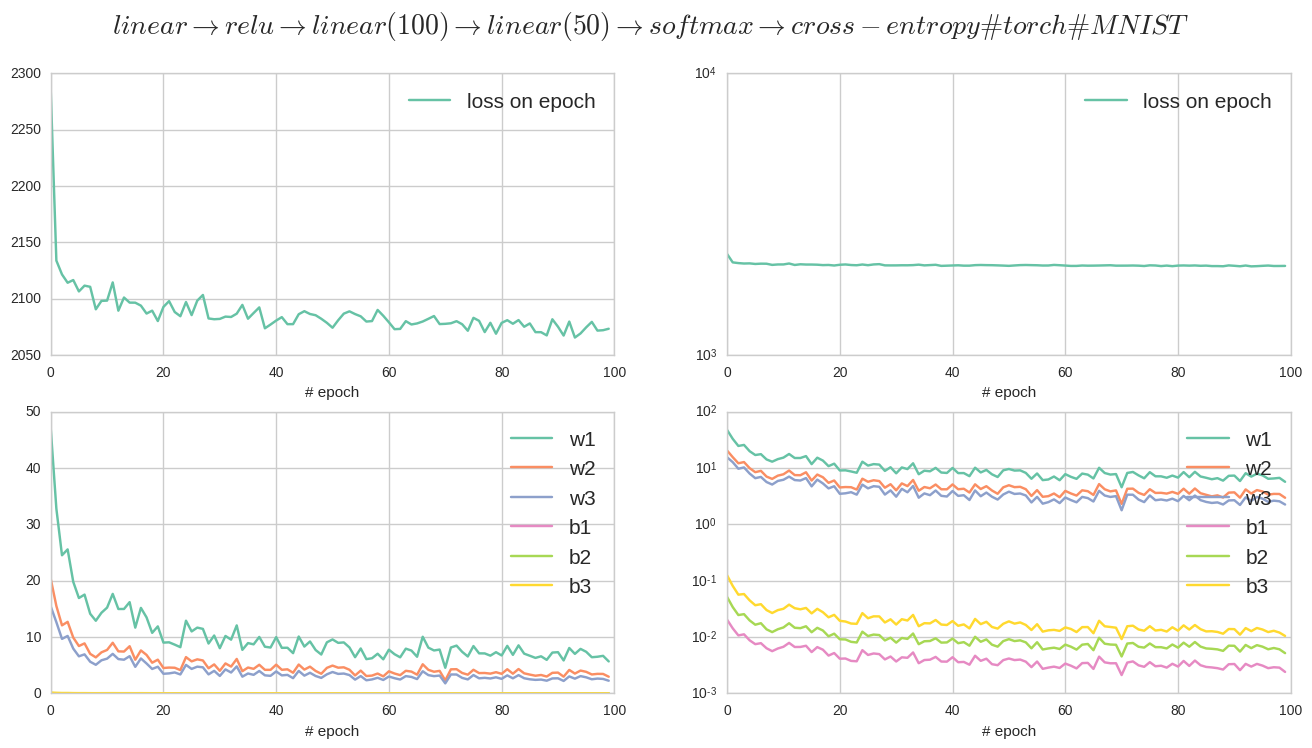

In [48]:
plot_results(losses, gradients, '$linear \\rightarrow relu \\rightarrow linear(100) \\rightarrow linear(50) \\rightarrow softmax \\rightarrow cross-entropy \# torch \# MNIST$', names=['w1','w2','w3','b1','b2','b3'])

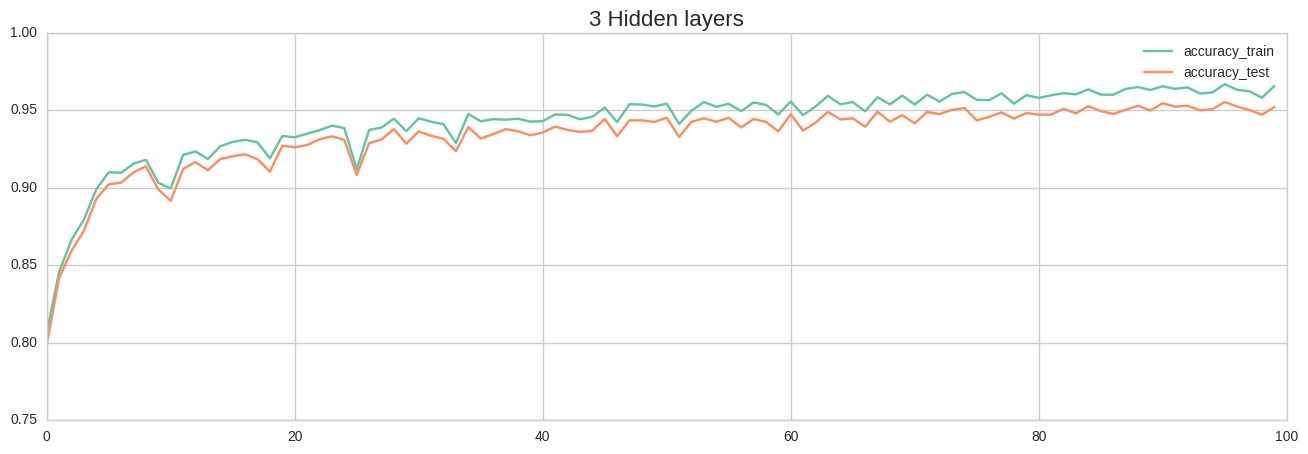

In [57]:
plt.figure(figsize=(16, 5))
plt.plot(range(len(accuracy_train_relu_3_layers)), accuracy_train_relu_3_layers, label = 'accuracy_train')
plt.plot(range(len(accuracy_test_relu_3_layers)), accuracy_test_relu_3_layers, label = 'accuracy_test')
plt.title('3 Hidden layers', fontsize = 16)
plt.legend()
plt.show()

#### 4-слойная сеть (784, 100, 75, 50, 10):

In [51]:
N, D1, D2, D3, D4, D5 = batch_size, X.shape[1], 100, 75, 50, Y.shape[1]
dtype = torch.FloatTensor

# Опишем переменные для проверки accuracy:
x_test = Variable(torch.from_numpy(X_test).type(dtype), requires_grad = False)
y_test = Variable(torch.from_numpy(Y_test).type(dtype), requires_grad = False)
x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

model = torch.nn.Sequential(
          torch.nn.Linear(D1, D2),
          torch.nn.ReLU(),
          torch.nn.Linear(D2, D3), 
          torch.nn.ReLU(),
          torch.nn.Linear(D3, D4),
          torch.nn.ReLU(),
          torch.nn.Linear(D4, D5),
          torch.nn.Softmax(),
        )
loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4

loss_avg = 0
losses = []
gradients = []
accuracy_test = []
accuracy_train = []

for t in range(100):
    grad_w1 = 0
    grad_b1 = 0
    grad_w2 = 0
    grad_b2 = 0
    grad_w3 = 0
    grad_b3 = 0
    grad_w4 = 0
    grad_b4 = 0
    X_train, Y_train = shuffle(X_train, Y_train)
    x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
    y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

    for b in xrange(n_batches):
        x = Variable(torch.from_numpy(X_train[b : b + batch_size, :]).type(dtype), requires_grad = False)
        y = Variable(torch.from_numpy(np.argmax(Y_train[b : b + batch_size, :], 1)).type(torch.LongTensor), requires_grad = False)
        y_pred = model(x)
        
        loss = loss_fn(input = y_pred, target = y)
        loss_avg += loss.data
        
        grad_w1 += list(model[0].parameters())[0].grad.data.norm()
        grad_b1 += list(model[0].parameters())[1].grad.data.norm()
        grad_w2 += list(model[2].parameters())[0].grad.data.norm()
        grad_b2 += list(model[2].parameters())[1].grad.data.norm()
        grad_w3 += list(model[4].parameters())[0].grad.data.norm()
        grad_b3 += list(model[4].parameters())[1].grad.data.norm()
        grad_w4 += list(model[4].parameters())[0].grad.data.norm()
        grad_b4 += list(model[4].parameters())[1].grad.data.norm()
        
        model.zero_grad()
        loss.backward()
        
        for param in model.parameters():
            param.data -= learning_rate * param.grad.data
        
        del x, y
        
    gradients.append((grad_w1 / n_batches, grad_w2 / n_batches, grad_w3 / n_batches, grad_w4 / n_batches,
                      grad_b1 / n_batches, grad_b2 / n_batches, grad_b3 / n_batches, grad_b4 / n_batches))
    losses.append(loss_avg[0] / batch_size)
    y_test_pred = make_label(model(x_test).data.numpy())
    y_train_pred = make_label(model(x_train).data.numpy())
    acc_test = accuracy(np.argmax(Y_test, 1), y_test_pred)
    accuracy_test.append(acc_test)
    acc_train = accuracy(np.argmax(Y_train, 1), y_train_pred)
    accuracy_train.append(acc_train)
    
    print ("%d, %.4f, %.4f" % (t, loss_avg[0] / batch_size, acc_test))
    loss_avg = 0

0, 2423.7200, 0.6804
1, 2339.8667, 0.7001
2, 2341.8592, 0.7155
3, 2309.4325, 0.7799
4, 2243.6850, 0.8041
5, 2201.8911, 0.7985
6, 2238.0037, 0.8121
7, 2211.2378, 0.8219
8, 2194.3463, 0.8271
9, 2228.4187, 0.8292
10, 2228.5158, 0.8277
11, 2209.4178, 0.8277
12, 2221.3492, 0.8227
13, 2211.5084, 0.8331
14, 2232.9656, 0.8320
15, 2215.0759, 0.8291
16, 2211.1425, 0.8451
17, 2198.2219, 0.8431
18, 2212.4591, 0.8424
19, 2216.5603, 0.8487
20, 2206.8805, 0.8369
21, 2204.4856, 0.8433
22, 2225.7492, 0.8446
23, 2209.9230, 0.8481
24, 2191.8798, 0.8521
25, 2181.4689, 0.8449
26, 2204.4100, 0.8479
27, 2199.4831, 0.8496
28, 2190.8942, 0.8471
29, 2208.0120, 0.8526
30, 2198.3619, 0.8544
31, 2210.7463, 0.8521
32, 2200.9344, 0.8494
33, 2218.8989, 0.8573
34, 2194.2142, 0.8552
35, 2195.5941, 0.8525
36, 2196.9359, 0.8562
37, 2214.3064, 0.8520
38, 2184.7261, 0.8577
39, 2208.8322, 0.8544
40, 2220.4658, 0.8535
41, 2194.2288, 0.8605
42, 2202.3373, 0.8596
43, 2188.3967, 0.8571
44, 2222.6377, 0.8556
45, 2187.8498, 0.859

In [52]:
loss_relu_4_layers = losses
accuracy_train_relu_4_layers = accuracy_train
accuracy_test_relu_4_layers = accuracy_test

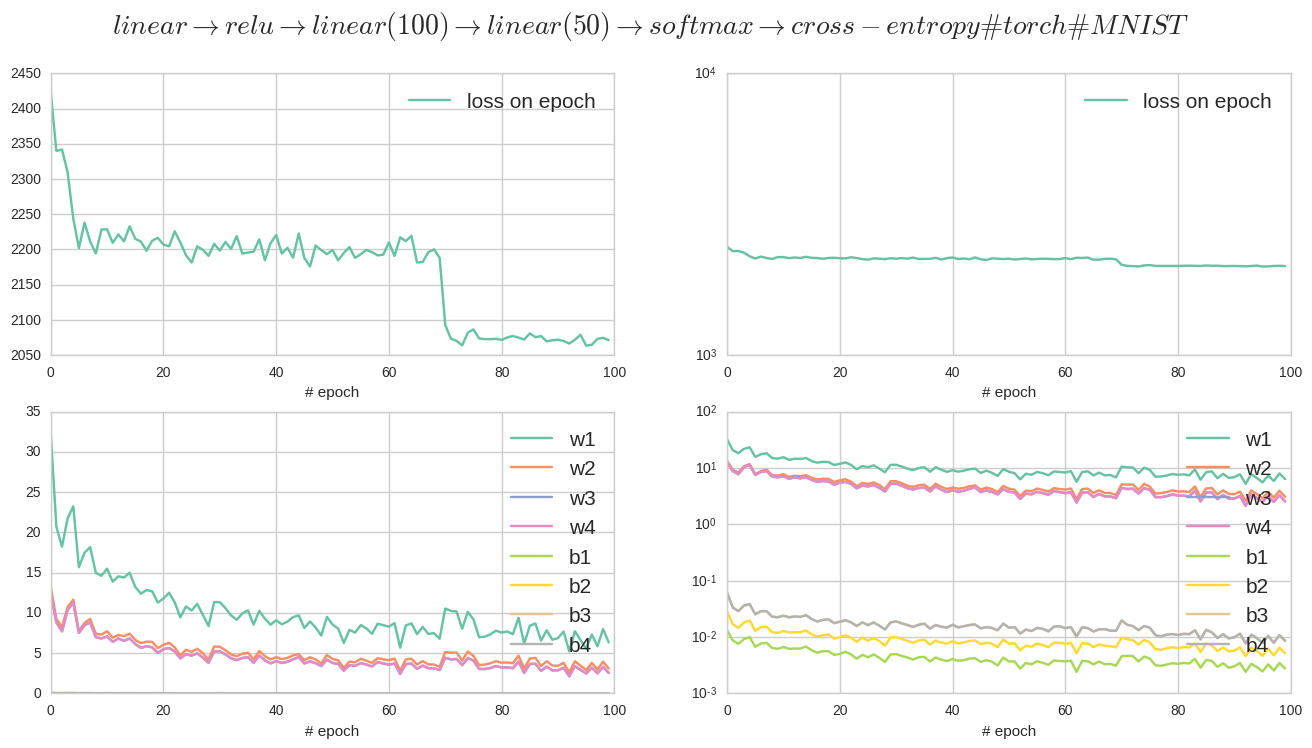

In [53]:
plot_results(losses, gradients, '$linear \\rightarrow relu \\rightarrow linear(100) \\rightarrow linear(50) \\rightarrow softmax \\rightarrow cross-entropy \# torch \# MNIST$', names=['w1','w2','w3', 'w4', 'b1','b2','b3', 'b4'])

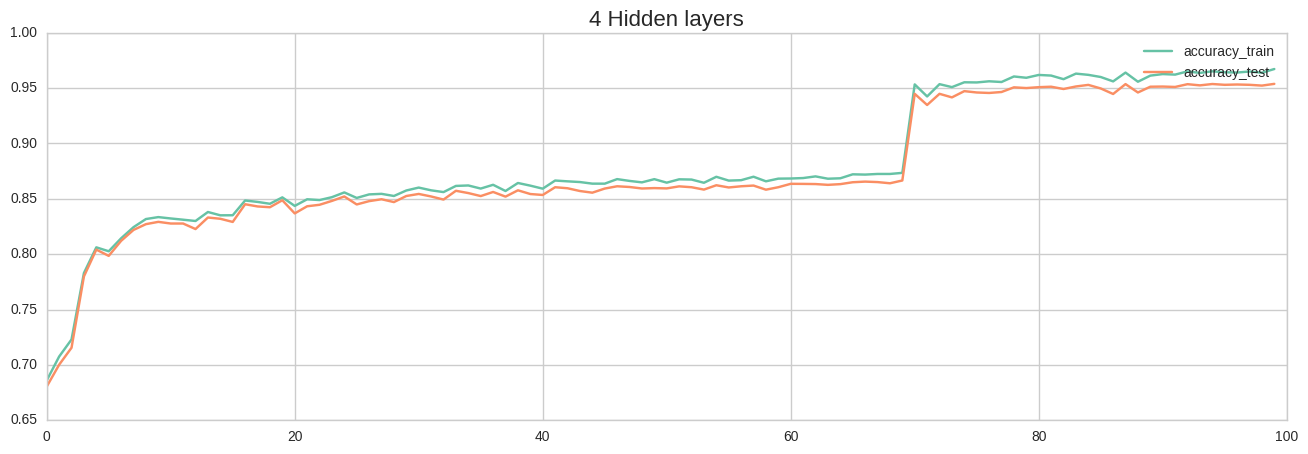

In [54]:
plt.figure(figsize=(16, 5))
plt.plot(range(len(accuracy_train_relu_4_layers)), accuracy_train_relu_4_layers, label = 'accuracy_train')
plt.plot(range(len(accuracy_test_relu_4_layers)), accuracy_test_relu_4_layers, label = 'accuracy_test')
plt.title('4 Hidden layers', fontsize = 16)
plt.legend()
plt.show()

#### Сравним, как ведyт себя loss и accuracy во время обучения при разном числе скрытых слоёв:

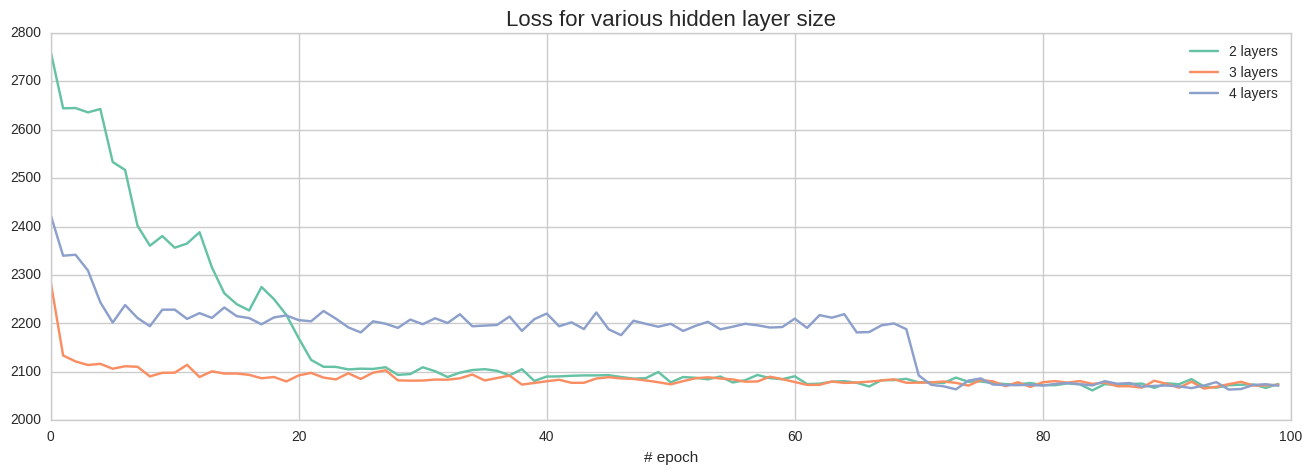

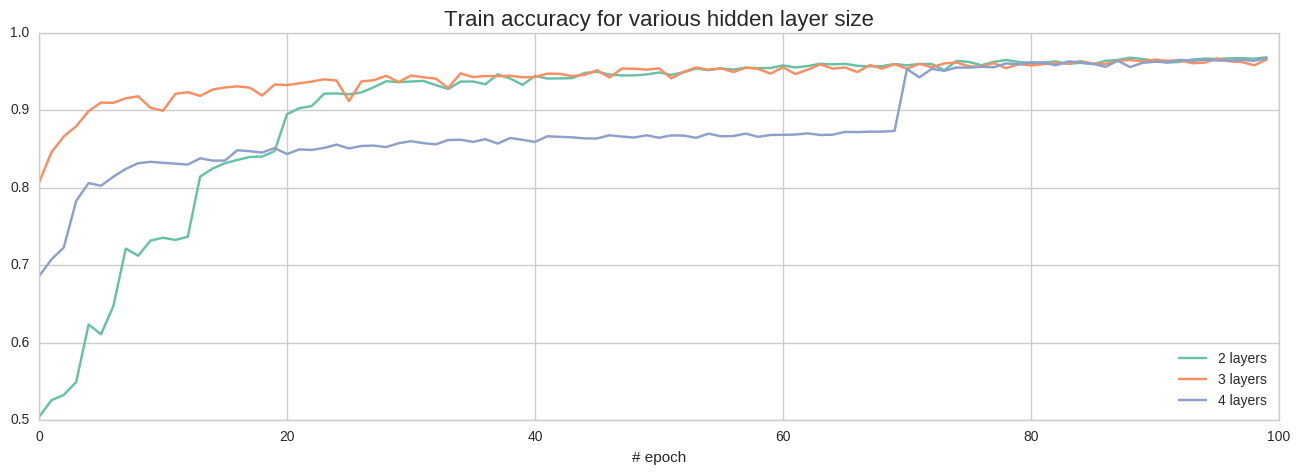

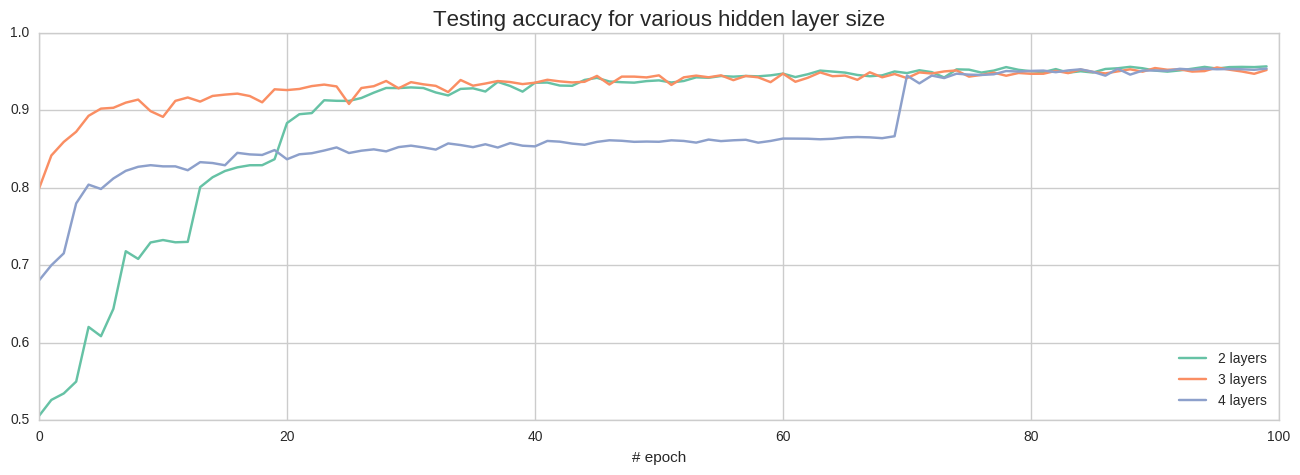

In [56]:
epochs = range(100)
plt.figure(figsize=(16, 5))
plt.plot(epochs, loss_relu_2_layers, label = '2 layers')
plt.plot(epochs, loss_relu_3_layers, label = '3 layers')
plt.plot(epochs, loss_relu_4_layers, label = '4 layers')
plt.title('Loss for various hidden layer size', fontsize = 16)
plt.xlabel('# epoch')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(epochs, accuracy_train_relu_2_layers, label = '2 layers')
plt.plot(epochs, accuracy_train_relu_3_layers, label = '3 layers')
plt.plot(epochs, accuracy_train_relu_4_layers, label = '4 layers')
plt.title('Train accuracy for various hidden layer size', fontsize = 16)
plt.xlabel('# epoch')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(epochs, accuracy_test_relu_2_layers, label = '2 layers')
plt.plot(epochs, accuracy_test_relu_3_layers, label = '3 layers')
plt.plot(epochs, accuracy_test_relu_4_layers, label = '4 layers')
plt.title('Testing accuracy for various hidden layer size', fontsize = 16)
plt.xlabel('# epoch')
plt.legend(loc='best')
plt.show()

#### Похоже, что компромиссный размер сети = 3 скрытых слоя; самая быстрая сходимость и оптимальное качество  при прочих равных. Сеть с 4 скрытыми слоями долго обучается до 70 эпохи (т.к. нужно "учить" гораздо больше весов, чем для 2- и 3-слойных структур), после чего делает резкий скачок. Вероятно, при увеличении числа эпох таких скачков может быть больше, чем один. Узнаем позже.

#### Возьмем нашу лучшую архитектуру, попробуем отлючить смещения:

In [63]:
N, D1, D2, D3, D4 = batch_size, X.shape[1], 100, 50, Y.shape[1]
dtype = torch.FloatTensor

# Опишем переменные для проверки accuracy:
x_test = Variable(torch.from_numpy(X_test).type(dtype), requires_grad = False)
y_test = Variable(torch.from_numpy(Y_test).type(dtype), requires_grad = False)
x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

model = torch.nn.Sequential(
          torch.nn.Linear(D1, D2, bias = False),
          torch.nn.ReLU(),
          torch.nn.Linear(D2, D3, bias = False), 
          torch.nn.ReLU(),
          torch.nn.Linear(D3, D4, bias = False),
          torch.nn.Softmax(),
        )
loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4

loss_avg = 0
losses = []
gradients = []
accuracy_test = []
accuracy_train = []

for t in range(100):
    grad_w1 = 0
    grad_w2 = 0
    grad_w3 = 0
    X_train, Y_train = shuffle(X_train, Y_train)
    x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
    y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

    for b in xrange(n_batches):
        x = Variable(torch.from_numpy(X_train[b : b + batch_size, :]).type(dtype), requires_grad = False)
        y = Variable(torch.from_numpy(np.argmax(Y_train[b : b + batch_size, :], 1)).type(torch.LongTensor), requires_grad = False)
        y_pred = model(x)
        
        loss = loss_fn(input = y_pred, target = y)
        loss_avg += loss.data
        
        grad_w1 += list(model[0].parameters())[0].grad.data.norm()
        grad_w2 += list(model[2].parameters())[0].grad.data.norm()
        grad_w3 += list(model[4].parameters())[0].grad.data.norm()
        
        model.zero_grad()
        loss.backward()
        
        for param in model.parameters():
            param.data -= learning_rate * param.grad.data
        
        del x, y
        
    gradients.append((grad_w1 / n_batches, grad_w2 / n_batches, grad_w3 / n_batches,))
    losses.append(loss_avg[0] / batch_size)
    y_test_pred = make_label(model(x_test).data.numpy())
    y_train_pred = make_label(model(x_train).data.numpy())
    acc_test = accuracy(np.argmax(Y_test, 1), y_test_pred)
    accuracy_test.append(acc_test)
    acc_train = accuracy(np.argmax(Y_train, 1), y_train_pred)
    accuracy_train.append(acc_train)
    
    print ("%d, %.4f, %.4f" % (t, loss_avg[0] / batch_size, acc_test))
    loss_avg = 0

0, 2421.3669, 0.7771
1, 2140.6241, 0.8309
2, 2125.4586, 0.8690
3, 2106.5963, 0.8864
4, 2120.1186, 0.8809
5, 2117.0977, 0.8817
6, 2124.4777, 0.8970
7, 2106.4773, 0.9016
8, 2098.6273, 0.9114
9, 2094.1477, 0.9084
10, 2103.8031, 0.9133
11, 2096.2378, 0.9112
12, 2093.3047, 0.9179
13, 2100.5089, 0.9017
14, 2096.4166, 0.9215
15, 2092.0345, 0.9254
16, 2092.7086, 0.9160
17, 2096.7745, 0.9236
18, 2080.4839, 0.9300
19, 2090.7175, 0.9301
20, 2094.6591, 0.9304
21, 2093.1800, 0.9296
22, 2095.3289, 0.9357
23, 2087.6286, 0.9353
24, 2085.2133, 0.9335
25, 2093.1480, 0.9306
26, 2082.2930, 0.9323
27, 2088.9677, 0.9367
28, 2081.7525, 0.9380
29, 2085.7747, 0.9386
30, 2083.9703, 0.9349
31, 2089.5670, 0.9371
32, 2080.3567, 0.9409
33, 2081.8589, 0.9395
34, 2083.1675, 0.9352
35, 2080.1370, 0.9352
36, 2086.2691, 0.9410
37, 2092.1189, 0.9438
38, 2087.4425, 0.9361
39, 2074.3545, 0.9433
40, 2077.7111, 0.9464
41, 2078.4727, 0.9430
42, 2080.5338, 0.9436
43, 2085.7558, 0.9387
44, 2078.6386, 0.9448
45, 2088.1614, 0.945

In [65]:
loss_relu_3_layers_nobias = losses
accuracy_train_relu_3_layers_nobias = accuracy_train
accuracy_test_relu_3_layers_nobias = accuracy_test

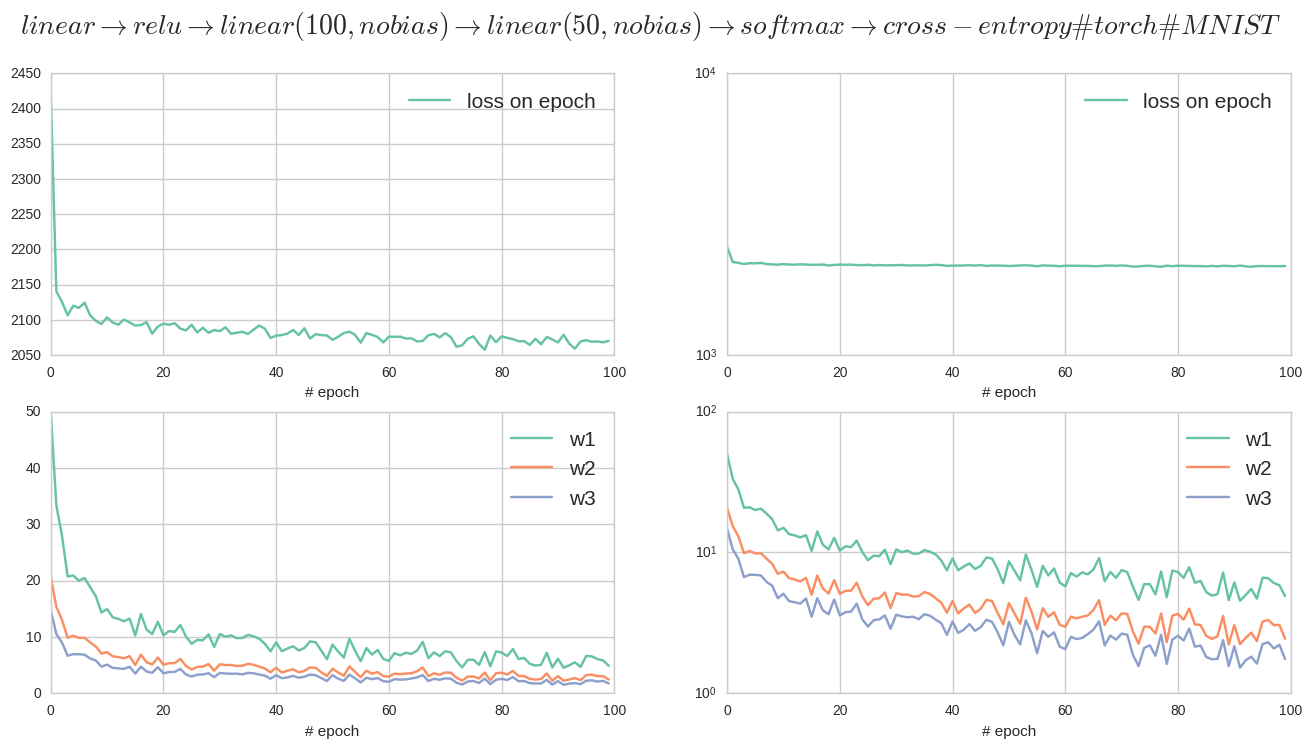

In [66]:
plot_results(losses, gradients, '$linear \\rightarrow relu \\rightarrow linear(100, no bias) \\rightarrow linear(50, no bias) \\rightarrow softmax \\rightarrow cross-entropy \# torch \# MNIST$', names=['w1','w2','w3'])

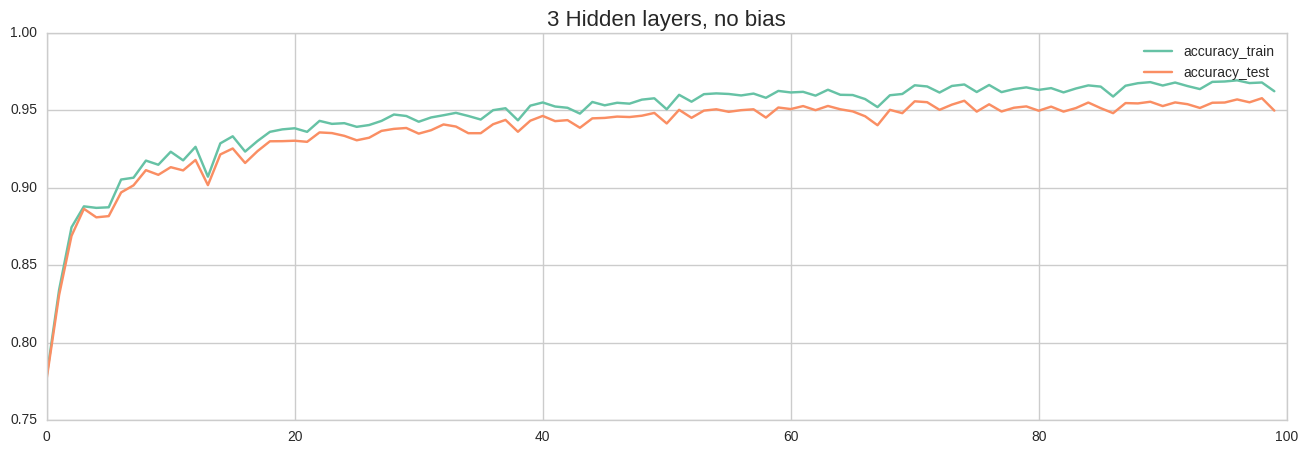

In [67]:
plt.figure(figsize=(16, 5))
plt.plot(range(len(accuracy_train_relu_3_layers_nobias)), accuracy_train_relu_3_layers_nobias, label = 'accuracy_train')
plt.plot(range(len(accuracy_test_relu_3_layers_nobias)), accuracy_test_relu_3_layers_nobias, label = 'accuracy_test')
plt.title('3 Hidden layers, no bias', fontsize = 16)
plt.legend()
plt.show()

#### Сравним обучение с bias и без:

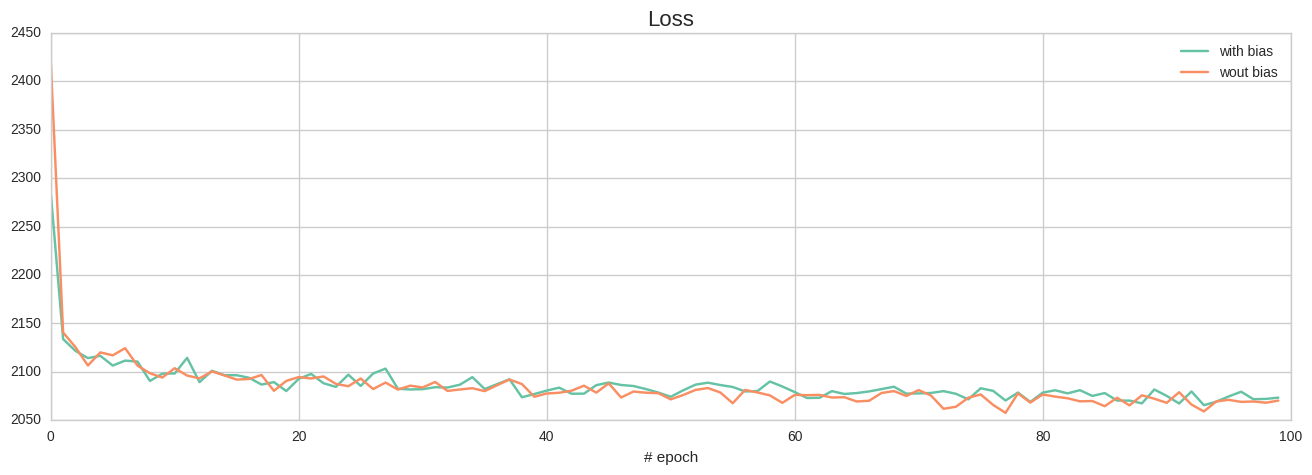

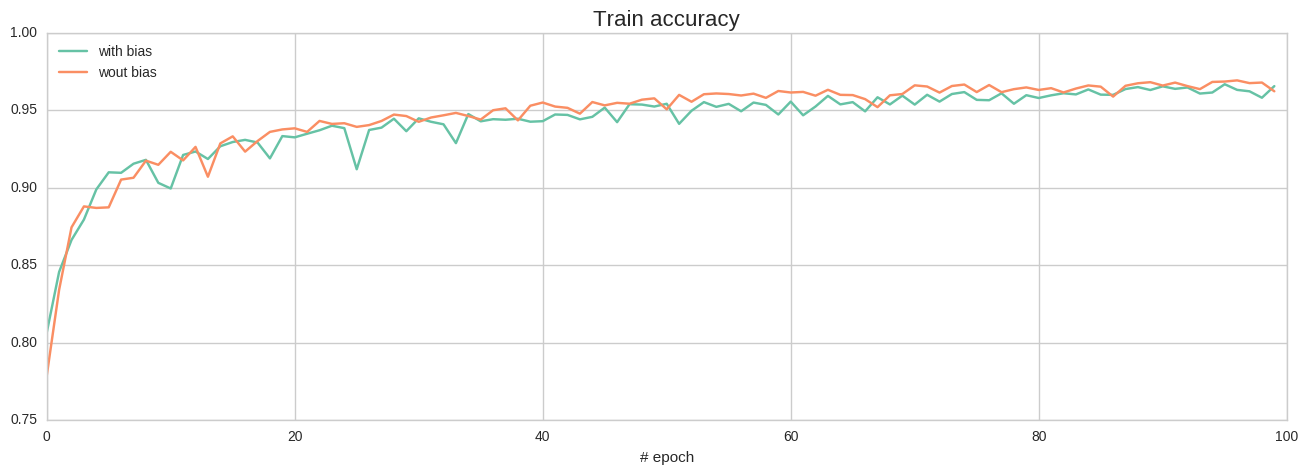

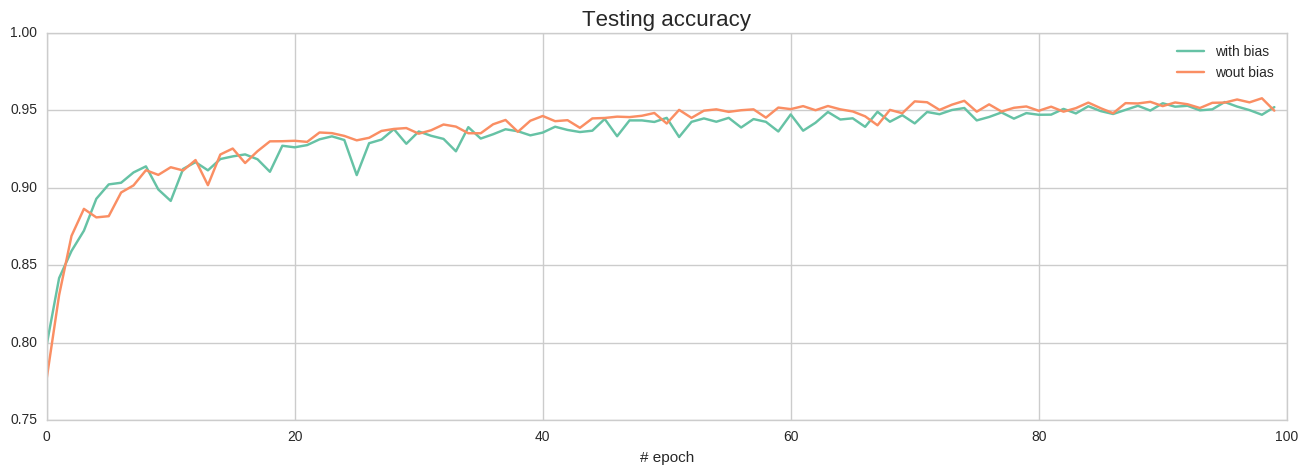

In [69]:
epochs = range(100)
plt.figure(figsize=(16, 5))
plt.plot(epochs, loss_relu_3_layers, label = 'with bias')
plt.plot(epochs, loss_relu_3_layers_nobias, label = 'wout bias')
plt.title('Loss', fontsize = 16)
plt.xlabel('# epoch')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(epochs, accuracy_train_relu_3_layers, label = 'with bias')
plt.plot(epochs, accuracy_train_relu_3_layers_nobias, label = 'wout bias')
plt.title('Train accuracy', fontsize = 16)
plt.xlabel('# epoch')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(epochs, accuracy_test_relu_3_layers, label = 'with bias')
plt.plot(epochs, accuracy_test_relu_3_layers_nobias, label = 'wout bias')
plt.title('Testing accuracy', fontsize = 16)
plt.xlabel('# epoch')
plt.legend(loc='best')
plt.show()

#### Разница если и есть, то совсем небольшая; оставим bias в нашей модели.

#### Итак, теперь у нас есть модель, классифицирующая данные MNIST с точность чуть выше 95%. Мы еще не пробовали играть с размером батча, а также использовали обычный градиентный спуск. Уменьшим размер батча до 10:

In [73]:
batch_size = 10
n_batches = X.shape[0] / batch_size

In [74]:
N, D1, D2, D3, D4 = batch_size, X.shape[1], 100, 50, Y.shape[1]
dtype = torch.FloatTensor

# Опишем переменные для проверки accuracy:
x_test = Variable(torch.from_numpy(X_test).type(dtype), requires_grad = False)
y_test = Variable(torch.from_numpy(Y_test).type(dtype), requires_grad = False)
x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

model = torch.nn.Sequential(
          torch.nn.Linear(D1, D2),
          torch.nn.ReLU(),
          torch.nn.Linear(D2, D3), 
          torch.nn.ReLU(),
          torch.nn.Linear(D3, D4),
          torch.nn.Softmax(),
        )
loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4

loss_avg = 0
losses = []
gradients = []
accuracy_test = []
accuracy_train = []

for t in range(100):
    grad_w1 = 0
    grad_b1 = 0
    grad_w2 = 0
    grad_b2 = 0
    grad_w3 = 0
    grad_b3 = 0
    X_train, Y_train = shuffle(X_train, Y_train)
    x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
    y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

    for b in xrange(n_batches):
        x = Variable(torch.from_numpy(X_train[b : b + batch_size, :]).type(dtype), requires_grad = False)
        y = Variable(torch.from_numpy(np.argmax(Y_train[b : b + batch_size, :], 1)).type(torch.LongTensor), requires_grad = False)
        y_pred = model(x)
        
        loss = loss_fn(input = y_pred, target = y)
        loss_avg += loss.data
        
        grad_w1 += list(model[0].parameters())[0].grad.data.norm()
        grad_b1 += list(model[0].parameters())[1].grad.data.norm()
        grad_w2 += list(model[2].parameters())[0].grad.data.norm()
        grad_b2 += list(model[2].parameters())[1].grad.data.norm()
        grad_w3 += list(model[4].parameters())[0].grad.data.norm()
        grad_b3 += list(model[4].parameters())[1].grad.data.norm()
        
        model.zero_grad()
        loss.backward()
        
        for param in model.parameters():
            param.data -= learning_rate * param.grad.data
        
        del x, y
        
    gradients.append((grad_w1 / n_batches, grad_w2 / n_batches, grad_w3 / n_batches,
                      grad_b1 / n_batches, grad_b2 / n_batches, grad_b3 / n_batches))
    losses.append(loss_avg[0] / batch_size)
    y_test_pred = make_label(model(x_test).data.numpy())
    y_train_pred = make_label(model(x_train).data.numpy())
    acc_test = accuracy(np.argmax(Y_test, 1), y_test_pred)
    accuracy_test.append(acc_test)
    acc_train = accuracy(np.argmax(Y_train, 1), y_train_pred)
    accuracy_train.append(acc_train)
    
    print ("%d, %.4f, %.4f" % (t, loss_avg[0] / batch_size, acc_test))
    loss_avg = 0

0, 11297.4391, 0.8601
1, 10716.4102, 0.8804
2, 10606.0391, 0.9064
3, 10602.6289, 0.9085
4, 10545.9258, 0.9203
5, 10542.3273, 0.9239
6, 10522.3953, 0.9304
7, 10501.9867, 0.9300
8, 10480.4000, 0.9359
9, 10481.2859, 0.9362
10, 10473.7250, 0.9366
11, 10459.5406, 0.9420
12, 10444.4688, 0.9438
13, 10434.5094, 0.9379
14, 10405.6625, 0.9360
15, 10433.8422, 0.9445
16, 10397.9914, 0.9446
17, 10414.7188, 0.9483
18, 10410.6930, 0.9428
19, 10398.0672, 0.9481
20, 10400.2766, 0.9496
21, 10402.7078, 0.9498
22, 10389.2367, 0.9499
23, 10383.5945, 0.9450
24, 10395.3750, 0.9532
25, 10360.9148, 0.9496
26, 10368.0375, 0.9539
27, 10382.3453, 0.9534
28, 10362.6094, 0.9547
29, 10366.2141, 0.9564
30, 10376.7789, 0.9551
31, 10387.5688, 0.9534
32, 10354.9969, 0.9549
33, 10354.1313, 0.9570
34, 10349.4977, 0.9589
35, 10343.6469, 0.9574
36, 10366.6414, 0.9546
37, 10350.6875, 0.9597
38, 10356.8969, 0.9599
39, 10368.6469, 0.9585
40, 10347.3125, 0.9590
41, 10340.5109, 0.9601
42, 10348.6758, 0.9624
43, 10334.5977, 0.954

In [76]:
loss_relu_3_layers_10batch = losses
accuracy_train_relu_3_layers_10batch = accuracy_train
accuracy_test_relu_3_layers_10batch = accuracy_test

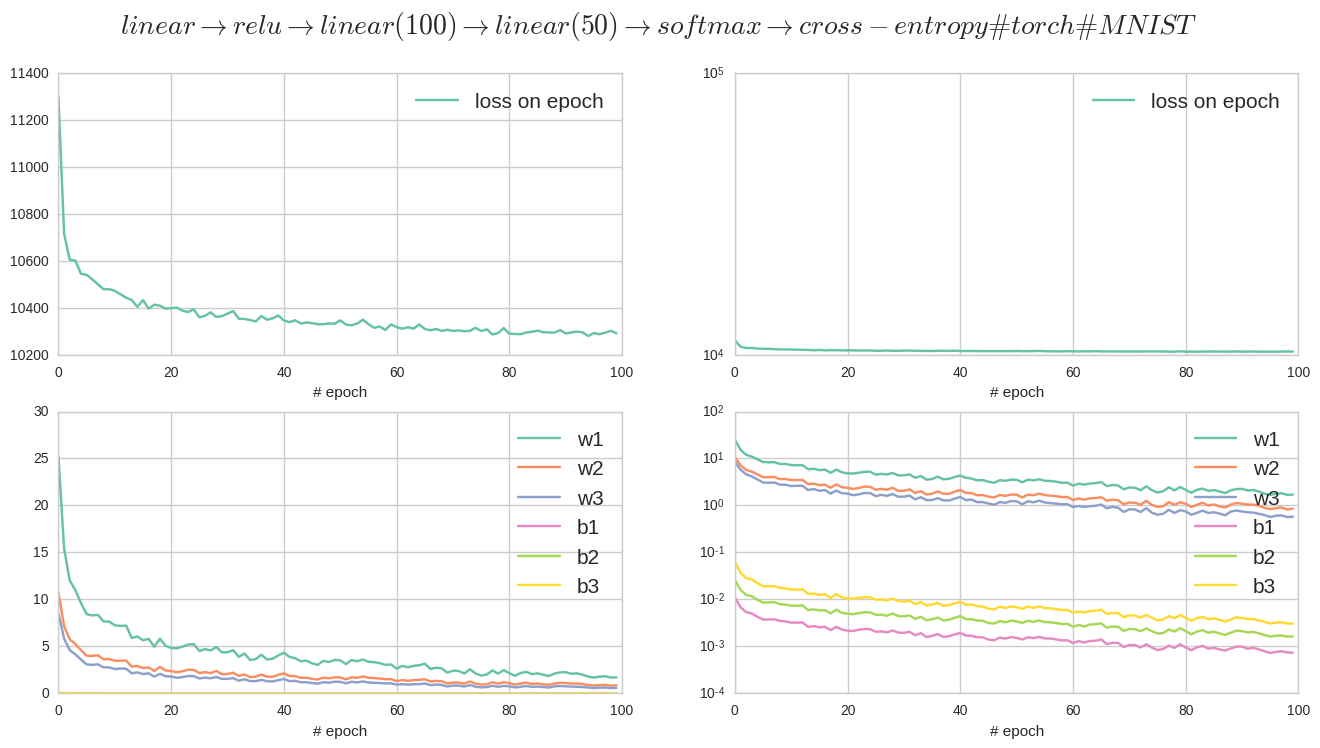

In [77]:
plot_results(losses, gradients, '$linear \\rightarrow relu \\rightarrow linear(100) \\rightarrow linear(50) \\rightarrow softmax \\rightarrow cross-entropy \# torch \# MNIST$', names=['w1','w2','w3','b1','b2','b3'])

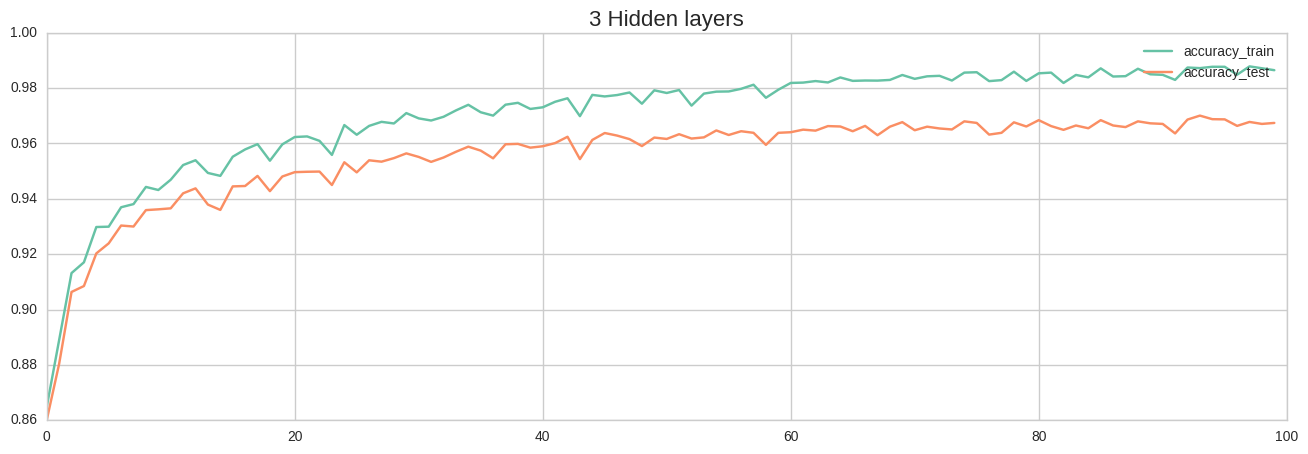

In [78]:
plt.figure(figsize=(16, 5))
plt.plot(range(len(accuracy_train_relu_3_layers_10batch)), accuracy_train_relu_3_layers_10batch, label = 'accuracy_train')
plt.plot(range(len(accuracy_test_relu_3_layers_10batch)), accuracy_test_relu_3_layers_10batch, label = 'accuracy_test')
plt.title('3 Hidden layers', fontsize = 16)
plt.legend()
plt.show()

#### Сравним обучение для батчей 10 и 50:

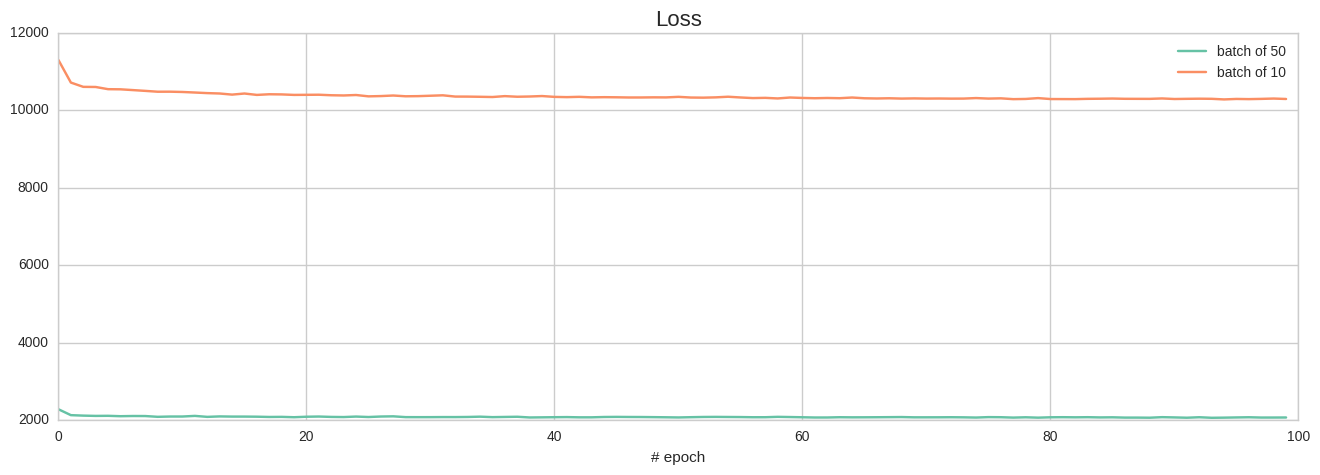

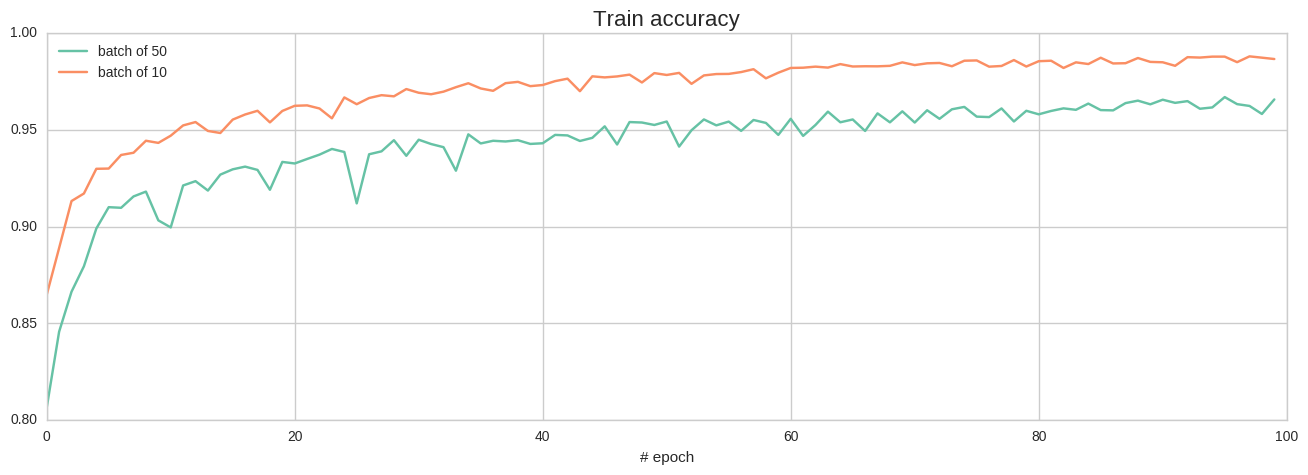

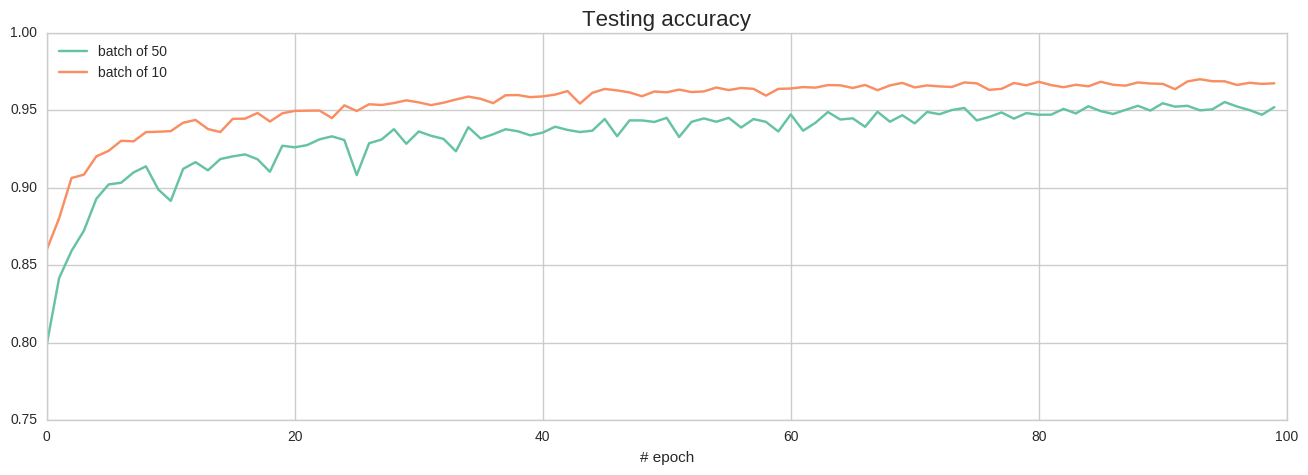

In [80]:
epochs = range(100)
plt.figure(figsize=(16, 5))
plt.plot(epochs, loss_relu_3_layers, label = 'batch of 50')
plt.plot(epochs, loss_relu_3_layers_10batch, label = 'batch of 10')
plt.title('Loss', fontsize = 16)
plt.xlabel('# epoch')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(epochs, accuracy_train_relu_3_layers, label = 'batch of 50')
plt.plot(epochs, accuracy_train_relu_3_layers_10batch, label = 'batch of 10')
plt.title('Train accuracy', fontsize = 16)
plt.xlabel('# epoch')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(epochs, accuracy_test_relu_3_layers, label = 'batch of 50')
plt.plot(epochs, accuracy_test_relu_3_layers_10batch, label = 'batch of 10')
plt.title('Testing accuracy', fontsize = 16)
plt.xlabel('# epoch')
plt.legend(loc='best')
plt.show()

#### Батч размером 10 победил. Есть соблазн попробовать он-лайн обучение, но это займет слишком много времени. Остановимся на 10-батче; Попробуем прикрутить какой-нибудь умный оптимизатор из torch.

# IV. Оптимизатор

#### Adam:

In [84]:
N, D1, D2, D3, D4 = batch_size, X.shape[1], 100, 50, Y.shape[1]
dtype = torch.FloatTensor

# Опишем переменные для проверки accuracy:
x_test = Variable(torch.from_numpy(X_test).type(dtype), requires_grad = False)
y_test = Variable(torch.from_numpy(Y_test).type(dtype), requires_grad = False)
x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

model = torch.nn.Sequential(
          torch.nn.Linear(D1, D2),
          torch.nn.ReLU(),
          torch.nn.Linear(D2, D3), 
          torch.nn.ReLU(),
          torch.nn.Linear(D3, D4),
          torch.nn.Softmax(),
        )
loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

loss_avg = 0
losses = []
gradients = []
accuracy_test = []
accuracy_train = []

for t in range(50):
    grad_w1 = 0
    grad_b1 = 0
    grad_w2 = 0
    grad_b2 = 0
    grad_w3 = 0
    grad_b3 = 0
    X_train, Y_train = shuffle(X_train, Y_train)
    x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
    y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

    for b in xrange(n_batches):
        x = Variable(torch.from_numpy(X_train[b : b + batch_size, :]).type(dtype), requires_grad = False)
        y = Variable(torch.from_numpy(np.argmax(Y_train[b : b + batch_size, :], 1)).type(torch.LongTensor), requires_grad = False)
        y_pred = model(x)
        
        loss = loss_fn(input = y_pred, target = y)
        loss_avg += loss.data
        
        grad_w1 += list(model[0].parameters())[0].grad.data.norm()
        grad_b1 += list(model[0].parameters())[1].grad.data.norm()
        grad_w2 += list(model[2].parameters())[0].grad.data.norm()
        grad_b2 += list(model[2].parameters())[1].grad.data.norm()
        grad_w3 += list(model[4].parameters())[0].grad.data.norm()
        grad_b3 += list(model[4].parameters())[1].grad.data.norm()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        del x, y
        
    gradients.append((grad_w1 / n_batches, grad_w2 / n_batches, grad_w3 / n_batches,
                      grad_b1 / n_batches, grad_b2 / n_batches, grad_b3 / n_batches))
    losses.append(loss_avg[0] / batch_size)
    y_test_pred = make_label(model(x_test).data.numpy())
    y_train_pred = make_label(model(x_train).data.numpy())
    acc_test = accuracy(np.argmax(Y_test, 1), y_test_pred)
    accuracy_test.append(acc_test)
    acc_train = accuracy(np.argmax(Y_train, 1), y_train_pred)
    accuracy_train.append(acc_train)
    
    print ("%d, %.4f, %.4f" % (t, loss_avg[0] / batch_size, acc_test))
    loss_avg = 0

0, 12143.5500, 0.8546
1, 10938.8820, 0.8491
2, 10812.6781, 0.9004
3, 10761.8477, 0.9061
4, 10720.6414, 0.9182
5, 10703.0008, 0.9161
6, 10665.2742, 0.9256
7, 10631.3547, 0.9186
8, 10707.6219, 0.9145
9, 10664.5562, 0.9298
10, 10614.6984, 0.9141
11, 10642.6688, 0.9336
12, 10600.9789, 0.9364
13, 10590.6125, 0.9321
14, 10621.9797, 0.9128
15, 10585.5336, 0.9294
16, 10623.9523, 0.9299
17, 10584.6352, 0.9291
18, 10604.3906, 0.9307
19, 10576.7875, 0.9313
20, 10576.4633, 0.9285
21, 10542.1938, 0.9394
22, 10594.4641, 0.9346
23, 10531.7891, 0.9474
24, 10538.7852, 0.9475
25, 10552.0930, 0.9388
26, 10558.7258, 0.9427
27, 10546.0500, 0.9402
28, 10545.4586, 0.9449
29, 10542.7812, 0.9468
30, 10534.2602, 0.9291
31, 10524.0898, 0.9364
32, 10509.2109, 0.9459
33, 10527.8172, 0.9471
34, 10524.2656, 0.9441
35, 10533.4305, 0.9501
36, 10494.8438, 0.9434
37, 10545.0281, 0.9502
38, 10519.2195, 0.9372
39, 10516.0867, 0.9396
40, 10567.2953, 0.9446
41, 10531.2641, 0.9499
42, 10532.5156, 0.9506
43, 10512.9047, 0.949

In [85]:
loss_adam = losses
accuracy_train_adam = accuracy_train
accuracy_test_adam = accuracy_test

#### Stochastic Gradient Descent

In [87]:
N, D1, D2, D3, D4 = batch_size, X.shape[1], 100, 50, Y.shape[1]
dtype = torch.FloatTensor

# Опишем переменные для проверки accuracy:
x_test = Variable(torch.from_numpy(X_test).type(dtype), requires_grad = False)
y_test = Variable(torch.from_numpy(Y_test).type(dtype), requires_grad = False)
x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

model = torch.nn.Sequential(
          torch.nn.Linear(D1, D2),
          torch.nn.ReLU(),
          torch.nn.Linear(D2, D3), 
          torch.nn.ReLU(),
          torch.nn.Linear(D3, D4),
          torch.nn.Softmax(),
        )
loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

loss_avg = 0
losses = []
gradients = []
accuracy_test = []
accuracy_train = []

for t in range(100):
    grad_w1 = 0
    grad_b1 = 0
    grad_w2 = 0
    grad_b2 = 0
    grad_w3 = 0
    grad_b3 = 0
    X_train, Y_train = shuffle(X_train, Y_train)
    x_train = Variable(torch.from_numpy(X_train).type(dtype), requires_grad = False)
    y_train = Variable(torch.from_numpy(Y_train).type(dtype), requires_grad = False)

    for b in xrange(n_batches):
        x = Variable(torch.from_numpy(X_train[b : b + batch_size, :]).type(dtype), requires_grad = False)
        y = Variable(torch.from_numpy(np.argmax(Y_train[b : b + batch_size, :], 1)).type(torch.LongTensor), requires_grad = False)
        y_pred = model(x)
        
        loss = loss_fn(input = y_pred, target = y)
        loss_avg += loss.data
        
        grad_w1 += list(model[0].parameters())[0].grad.data.norm()
        grad_b1 += list(model[0].parameters())[1].grad.data.norm()
        grad_w2 += list(model[2].parameters())[0].grad.data.norm()
        grad_b2 += list(model[2].parameters())[1].grad.data.norm()
        grad_w3 += list(model[4].parameters())[0].grad.data.norm()
        grad_b3 += list(model[4].parameters())[1].grad.data.norm()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        del x, y
        
    gradients.append((grad_w1 / n_batches, grad_w2 / n_batches, grad_w3 / n_batches,
                      grad_b1 / n_batches, grad_b2 / n_batches, grad_b3 / n_batches))
    losses.append(loss_avg[0] / batch_size)
    y_test_pred = make_label(model(x_test).data.numpy())
    y_train_pred = make_label(model(x_train).data.numpy())
    acc_test = accuracy(np.argmax(Y_test, 1), y_test_pred)
    accuracy_test.append(acc_test)
    acc_train = accuracy(np.argmax(Y_train, 1), y_train_pred)
    accuracy_train.append(acc_train)
    
    print ("%d, %.4f, %.4f" % (t, loss_avg[0] / batch_size, acc_test))
    loss_avg = 0

0, 11348.7867, 0.8731
1, 10653.4016, 0.8843
2, 10592.6063, 0.9104
3, 10575.7000, 0.9148
4, 10541.2336, 0.9217
5, 10516.5320, 0.9272
6, 10525.3703, 0.9346
7, 10504.9086, 0.9351
8, 10496.1586, 0.9378
9, 10468.0531, 0.9375
10, 10462.2195, 0.9367
11, 10455.0227, 0.9428
12, 10445.8539, 0.9434
13, 10436.8117, 0.9462
14, 10429.2766, 0.9482
15, 10427.3586, 0.9488
16, 10429.6562, 0.9489
17, 10410.5516, 0.9478
18, 10443.6602, 0.9514
19, 10410.8109, 0.9489
20, 10407.8875, 0.9521
21, 10389.0477, 0.9474
22, 10377.0555, 0.9561
23, 10389.1031, 0.9526
24, 10380.6461, 0.9549
25, 10388.9117, 0.9549
26, 10387.7086, 0.9546
27, 10372.9156, 0.9537
28, 10383.4609, 0.9576
29, 10356.2953, 0.9567
30, 10367.5000, 0.9571
31, 10356.9898, 0.9561
32, 10359.3695, 0.9541
33, 10350.5258, 0.9535
34, 10357.2125, 0.9574
35, 10349.4430, 0.9569
36, 10342.9070, 0.9559
37, 10343.6328, 0.9581
38, 10341.9172, 0.9587
39, 10347.6273, 0.9605
40, 10342.1945, 0.9606
41, 10345.3555, 0.9590
42, 10348.8656, 0.9603
43, 10338.8961, 0.960

In [88]:
loss_sgd = losses
accuracy_train_sgd = accuracy_train
accuracy_test_sgd = accuracy_test

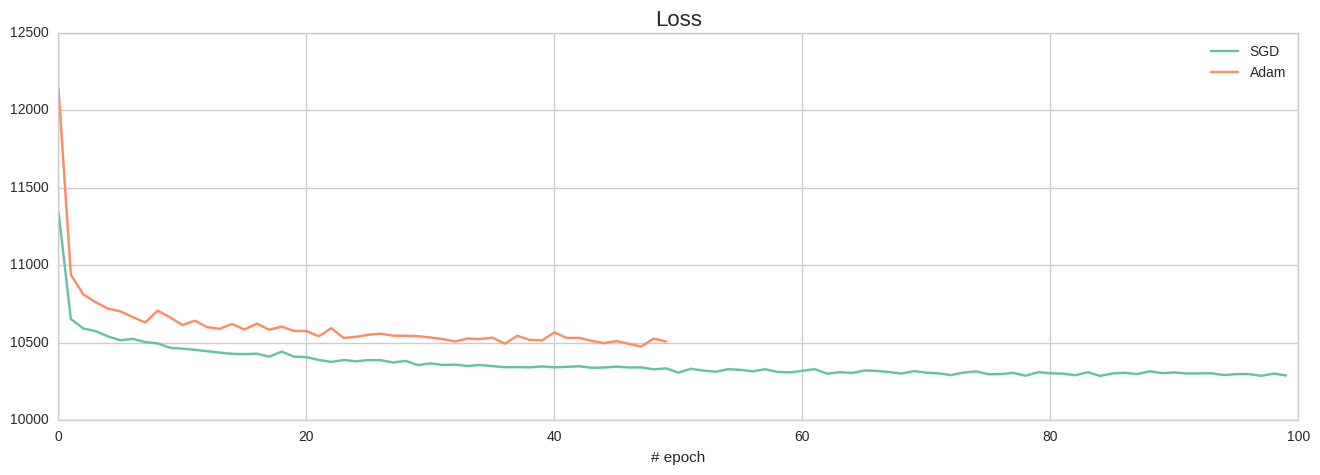

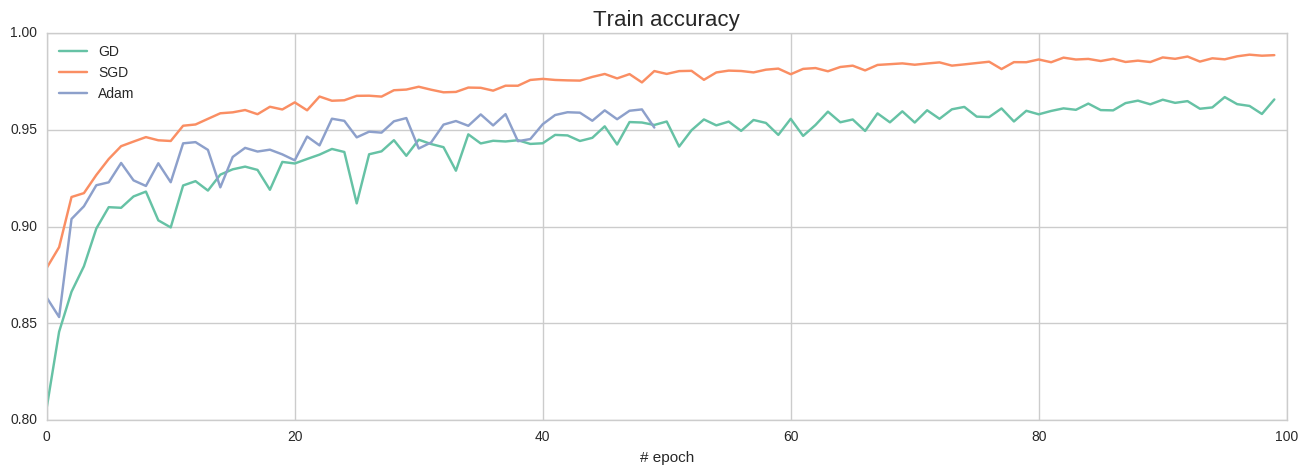

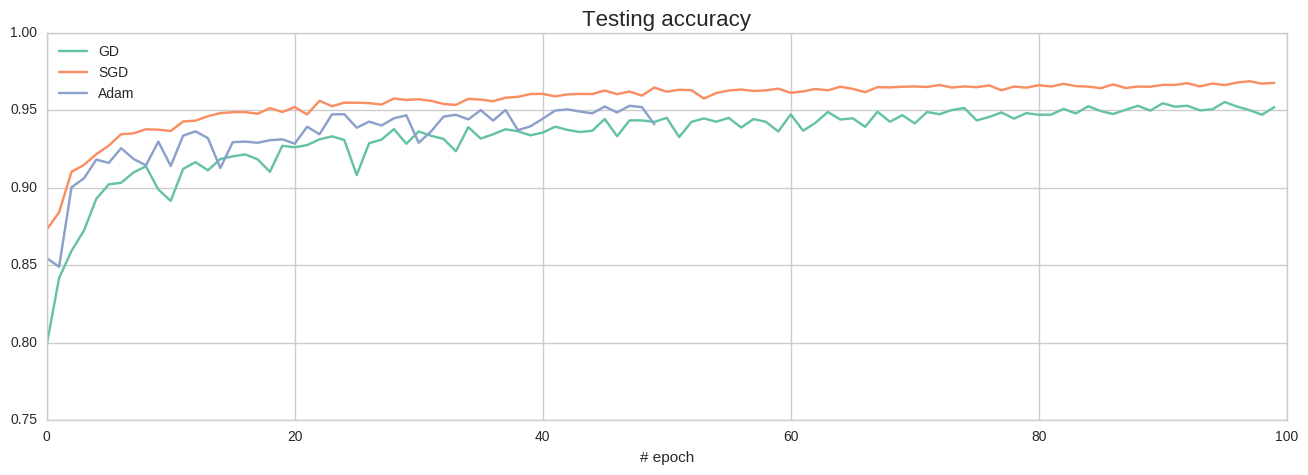

In [98]:
epochs = range(100)
plt.figure(figsize=(16, 5))
plt.plot(loss_sgd, label = 'SGD')
plt.plot(loss_adam, label = 'Adam')
plt.title('Loss', fontsize = 16)
plt.xlabel('# epoch')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(accuracy_train_relu_3_layers, label = 'GD')
plt.plot(accuracy_train_sgd, label = 'SGD')
plt.plot(accuracy_train_adam, label = 'Adam')
plt.title('Train accuracy', fontsize = 16)
plt.xlabel('# epoch')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(accuracy_test_relu_3_layers, label = 'GD')
plt.plot(accuracy_test_sgd, label = 'SGD')
plt.plot(accuracy_test_adam, label = 'Adam')
plt.title('Testing accuracy', fontsize = 16)
plt.xlabel('# epoch')
plt.legend(loc='best')
plt.show()

#### Как видим, метод стохастического градиентного спуска показывает лучший результат среди рассмотренных. Остальные оптимизаторы из пакета тренируются слишком долго для проверки на достаточном количестве эпох.

# Вывод
## Были рассмотрены следующие параметры:
### 1. Функция активации (нелинейность после линейного слоя): Sigmoid, ReLU, Tanh, Softmax.
### 2. Функция потерь: MSE, Cross-Entropy.
### 3. Число нейронов на скрытом слое: 10, 50, 100, 300.
### 4. Число скрытых слоев: 1, 2, 3, 4.
### 5. Оптимизаторы для процедуры градиентного спуска: GD, SGD, Adam.

## В результате лучшую точность на тестовой выборке показала нейросеть со следующей структурой:
### 1. Input(100)
### 2. ReLU( )
### 3. Linear(50)
### 4. ReLU( )
### 5. Linear(10)
### 6. Softmax( )
### 7. Cross-Entropy( )